In [103]:
import pandas as pd
import numpy as np
import importlib
import gc
import sys
sys.path.append('./scripts')  
import model_lgb
import graficos
importlib.reload(model_lgb)
importlib.reload(graficos)

<module 'graficos' from 'c:\\Users\\Usuario\\Documents\\Universidad\\austral\\2025\\Lab3\\Lab3-MCD\\notebooks\\entregable\\./scripts\\graficos.py'>

In [80]:
df = pd.read_csv("./datasets/periodo_x_producto_con_target_transformado_con_feature_engineering.csv", sep=',', encoding='utf-8')
df

product_id  periodo  nacimiento_producto  muerte_producto  mes_n  \
0           20001   201701               201701           201912      1   
1           20001   201702               201701           201912      2   
2           20001   201703               201701           201912      3   
3           20001   201704               201701           201912      4   
4           20001   201705               201701           201912      5   
...           ...      ...                  ...              ...    ...   
31357       21281   201704               201702           201708      3   
31358       21281   201705               201702           201708      4   
31359       21281   201706               201702           201708      5   
31360       21281   201707               201702           201708      6   
31361       21281   201708               201702           201708      7   

       total_meses  producto_nuevo  ciclo_de_vida_inicial  sku_size  \
0               36               0                      0    3000.0   
1               36               0                      0    3000.0   
2               36               0                      0    3000.0   
3               36               0                      0    3000.0   
4               36               0                      0    3000.0   
...            ...             ...                    ...       ...   
31357            7               1                      1       NaN   
31358            7               1                      0       NaN   
31359            7               1                      0       NaN   
31360            7               1                      0       NaN   
31361            7               1                      0       NaN   

       stock_final  ...  elecciones_legislativas_1  elecciones_legislativas_2  \
0              NaN  ...                          0                          0   
1              NaN  ...                          0                          0   
2              NaN  ...                          0                          0   
3              NaN  ...                          0                          0   
4              NaN  ...                          0                          0   
...            ...  ...                        ...                        ...   
31357          NaN  ...                          0                          0   
31358          NaN  ...                          0                          0   
31359          NaN  ...                          0                          0   
31360          NaN  ...                          0                          0   
31361          NaN  ...                          1                          0   

       crisis_cambiaria_1  crisis_cambiaria_2  las_paso_2019_1  \
0                       0                   0                0   
1                       0                   0                0   
2                       0                   0                0   
3                       0                   0                0   
4                       0                   0                0   
...                   ...                 ...              ...   
31357                   0                   0                0   
31358                   0                   0                0   
31359                   0                   0                0   
31360                   0                   0                0   
31361                   0                   0                0   

       las_paso_2019_2  devaluacion_post_PASO  elecciones_presidenciales_2019  \
0                    0                      0                               0   
1                    0                      0                               0   
2                    0                      0                               0   
3                    0                      0                               0   
4                    0                      0                               0   
.

In [45]:
df['ipc'] = df['ipc'].str.replace(',', '.').astype(float)
df['dolar'] = df['dolar'].str.replace(',', '.').astype(float)
df.drop(columns=['ds'], inplace=True)
df.fillna(0, inplace=True) ##### EXPERIMENTAR

In [46]:
##### SPLIT DATASET #####
train = df[df['periodo'] < 201910]
test = df[df['periodo'] == 201910]

print("El dataset de train tiene {} filas y {} columnas".format(train.shape[0], train.shape[1]))
print("El dataset de train tiene {} filas y {} columnas".format(test.shape[0], test.shape[1]))

El dataset de train tiene 28656 filas y 416 columnas
El dataset de train tiene 916 filas y 416 columnas


##### Train 1

- Sin semillero en optuna
- Con semillero en prediccion
- 50 iteraciones.

In [35]:
##### Entrenamiento 1
model_lgb.optimizar_con_optuna(train)

[I 2025-06-15 16:10:37,355] A new study created in memory with name: no-name-6f5a758a-2575-43de-a555-f41fd74fcee7


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5508, Parámetros={'num_leaves': 17, 'learning_rate': 0.28403203141749855, 'feature_fraction': 0.7742723610239932, 'bagging_fraction': 0.9448298617751271, 'bagging_freq': 6, 'lambda_l1': 0.0022061237642984803, 'lambda_l2': 2.4962532657096865e-06, 'min_child_samples': 50, 'max_depth': 3, 'max_bin': 483, 'min_data_in_leaf': 82, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5068, Parámetros={'num_leaves': 145, 'learning_rate': 0.032193392653351506, 'feature_fraction': 0.9672272599035762, 'bagging_fraction': 0.7822812362188019, 'bagging_freq': 10, 'lambda_l1': 0.00020650983181624136, 'lambda_l2': 0.00011947871647886059, 'min_child_samples': 15, 'max_depth': 6, 'max_bin': 464, 'min_data_in_leaf': 88, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5068, Parámetros={'num_leaves': 145, 'learning_rate': 0.032193392653351506, 'feature_fraction': 0.9672272599035762, 'bagging_fraction': 0.7822812362188019, 'bagging_freq': 10, 'lambda_l1': 0.00020650983181624136, 'lambda_l2': 0.00011947871647886059, 'min_child_samples': 15, 'max_depth': 6, 'max_bin': 464, 'min_data_in_leaf': 88, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5068, Parámetros={'num_leaves': 145, 'learning_rate': 0.032193392653351506, 'feature_fraction': 0.9672272599035762, 'bagging_fraction': 0.7822812362188019, 'bagging_freq': 10, 'lambda_l1': 0.00020650983181624136, 'lambda_l2': 0.00011947871647886059, 'min_child_samples': 15, 'max_depth': 6, 'max_bin': 464, 'min_data_in_leaf': 88, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5068, Parámetros={'num_leaves': 145, 'learning_rate': 0.032193392653351506, 'feature_fraction': 0.9672272599035762, 'bagging_fraction': 0.7822812362188019, 'bagging_freq': 10, 'lambda_l1': 0.00020650983181624136, 'lambda_l2': 0.00011947871647886059, 'min_child_samples': 15, 'max_depth': 6, 'max_bin': 464, 'min_data_in_leaf': 88, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5068, Parámetros={'num_leaves': 145, 'learning_rate': 0.032193392653351506, 'feature_fraction': 0.9672272599035762, 'bagging_fraction': 0.7822812362188019, 'bagging_freq': 10, 'lambda_l1': 0.00020650983181624136, 'lambda_l2': 0.00011947871647886059, 'min_child_samples': 15, 'max_depth': 6, 'max_bin': 464, 'min_data_in_leaf': 88, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4678, Parámetros={'num_leaves': 189, 'learning_rate': 0.0936859962234406, 'feature_fraction': 0.6224613816518707, 'bagging_fraction': 0.6827030485019208, 'bagging_freq': 4, 'lambda_l1': 1.9201519607202656e-06, 'lambda_l2': 1.6713651902359126e-06, 'min_child_samples': 35, 'max_depth': 4, 'max_bin': 122, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4678, Parámetros={'num_leaves': 189, 'learning_rate': 0.0936859962234406, 'feature_fraction': 0.6224613816518707, 'bagging_fraction': 0.6827030485019208, 'bagging_freq': 4, 'lambda_l1': 1.9201519607202656e-06, 'lambda_l2': 1.6713651902359126e-06, 'min_child_samples': 35, 'max_depth': 4, 'max_bin': 122, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4678, Parámetros={'num_leaves': 189, 'learning_rate': 0.0936859962234406, 'feature_fraction': 0.6224613816518707, 'bagging_fraction': 0.6827030485019208, 'bagging_freq': 4, 'lambda_l1': 1.9201519607202656e-06, 'lambda_l2': 1.6713651902359126e-06, 'min_child_samples': 35, 'max_depth': 4, 'max_bin': 122, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4665, Parámetros={'num_leaves': 90, 'learning_rate': 0.052415526472638384, 'feature_fraction': 0.707257177865517, 'bagging_fraction': 0.6421156497304483, 'bagging_freq': 2, 'lambda_l1': 8.281915265472356e-08, 'lambda_l2': 4.942674574835118e-08, 'min_child_samples': 30, 'max_depth': 3, 'max_bin': 217, 'min_data_in_leaf': 17, 'extra_trees': False}
Mejores hiperparámetros: {'num_leaves': 90, 'learning_rate': 0.052415526472638384, 'feature_fraction': 0.707257177865517, 'bagging_fraction': 0.6421156497304483, 'bagging_freq': 2, 'lambda_l1': 8.281915265472356e-08, 'lambda_l2': 4.942674574835118e-08, 'min_child_samples': 30, 'max_depth': 3, 'max_bin': 217, 'min_data_in_leaf': 17, 'extra_trees': False}


In [50]:
test['target']

33       0.281125
69       0.177542
105      0.015896
141     -0.189256
177     -0.269215
           ...   
31269   -0.436252
31279   -0.941507
31295    0.000000
31323   -1.070528
31352   -0.821303
Name: target, Length: 916, dtype: float64

In [65]:
df_pred_201912 = model_lgb.semillerio_en_prediccion(train, test)

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\sit

In [53]:
df_pred_201912

periodo  product_id    target      pred
33      201910       20001  0.281125 -0.261016
69      201910       20002  0.177542  0.202874
105     201910       20003  0.015896 -0.257282
141     201910       20004 -0.189256 -0.903300
177     201910       20005 -0.269215 -0.984110
...        ...         ...       ...       ...
31269   201910       21266 -0.436252 -0.189571
31279   201910       21267 -0.941507  0.539105
31295   201910       21269  0.000000  0.604015
31323   201910       21271 -1.070528 -0.476353
31352   201910       21276 -0.821303 -0.803491

[916 rows x 4 columns]

In [61]:
df_pred_201912_real = model_lgb.desnormalizar(df_pred_201912)
df_pred_201912_real

periodo  product_id      target         pred
0     201910       20001  1504.68856  1355.565121
1     201910       20002  1087.30855  1094.603730
2     201910       20003   892.50129   811.021639
3     201910       20004   637.90002   474.929008
4     201910       20005   593.24443   434.301657
..       ...         ...         ...          ...
775   201910       21263     0.01270     0.026795
776   201910       21265     0.05007     0.130173
777   201910       21266     0.05121     0.063978
778   201910       21267     0.01569     0.119962
779   201910       21276     0.00892     0.009412

[780 rows x 4 columns]

In [63]:
total_error_rate = model_lgb.total_forecast_error(df_pred_201912_real)
total_error_rate

0.2942483411744829

##### Train 2

- Con semillero en optuna
- Con semillero en prediccion
- 50 iteraciones.

In [68]:
##### Entrenamiento 2
model_lgb.optimizar_con_optuna_con_semillerio(train, version='v2')

[I 2025-06-15 17:52:17,242] A new study created in memory with name: no-name-00392a3a-e446-4cd0-a77f-980007417308
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c

Mejor trial hasta ahora: RMSE=0.5205, Parámetros={'num_leaves': 162, 'learning_rate': 0.24388859999074375, 'feature_fraction': 0.9587082227780889, 'bagging_fraction': 0.719600041389775, 'bagging_freq': 6, 'lambda_l1': 0.00015707930606181185, 'lambda_l2': 2.3859627351050668e-08, 'min_child_samples': 37, 'max_depth': 3, 'max_bin': 422, 'min_data_in_leaf': 67, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5205, Parámetros={'num_leaves': 162, 'learning_rate': 0.24388859999074375, 'feature_fraction': 0.9587082227780889, 'bagging_fraction': 0.719600041389775, 'bagging_freq': 6, 'lambda_l1': 0.00015707930606181185, 'lambda_l2': 2.3859627351050668e-08, 'min_child_samples': 37, 'max_depth': 3, 'max_bin': 422, 'min_data_in_leaf': 67, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5174, Parámetros={'num_leaves': 88, 'learning_rate': 0.018148619527435298, 'feature_fraction': 0.7331772726784991, 'bagging_fraction': 0.5890575925345549, 'bagging_freq': 6, 'lambda_l1': 0.08782502528346073, 'lambda_l2': 7.703317587144348e-08, 'min_child_samples': 5, 'max_depth': 7, 'max_bin': 493, 'min_data_in_leaf': 77, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5049, Parámetros={'num_leaves': 43, 'learning_rate': 0.028535675679557816, 'feature_fraction': 0.9139297413934301, 'bagging_fraction': 0.5236275740211975, 'bagging_freq': 10, 'lambda_l1': 0.004996771063701402, 'lambda_l2': 0.7196921694355832, 'min_child_samples': 20, 'max_depth': 8, 'max_bin': 396, 'min_data_in_leaf': 51, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4932, Parámetros={'num_leaves': 56, 'learning_rate': 0.09293250023413166, 'feature_fraction': 0.5303076606267193, 'bagging_fraction': 0.774783378611908, 'bagging_freq': 4, 'lambda_l1': 0.027649728761586195, 'lambda_l2': 0.0001052101618753153, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 115, 'min_data_in_leaf': 96, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4932, Parámetros={'num_leaves': 56, 'learning_rate': 0.09293250023413166, 'feature_fraction': 0.5303076606267193, 'bagging_fraction': 0.774783378611908, 'bagging_freq': 4, 'lambda_l1': 0.027649728761586195, 'lambda_l2': 0.0001052101618753153, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 115, 'min_data_in_leaf': 96, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4932, Parámetros={'num_leaves': 56, 'learning_rate': 0.09293250023413166, 'feature_fraction': 0.5303076606267193, 'bagging_fraction': 0.774783378611908, 'bagging_freq': 4, 'lambda_l1': 0.027649728761586195, 'lambda_l2': 0.0001052101618753153, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 115, 'min_data_in_leaf': 96, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4932, Parámetros={'num_leaves': 56, 'learning_rate': 0.09293250023413166, 'feature_fraction': 0.5303076606267193, 'bagging_fraction': 0.774783378611908, 'bagging_freq': 4, 'lambda_l1': 0.027649728761586195, 'lambda_l2': 0.0001052101618753153, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 115, 'min_data_in_leaf': 96, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4932, Parámetros={'num_leaves': 56, 'learning_rate': 0.09293250023413166, 'feature_fraction': 0.5303076606267193, 'bagging_fraction': 0.774783378611908, 'bagging_freq': 4, 'lambda_l1': 0.027649728761586195, 'lambda_l2': 0.0001052101618753153, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 115, 'min_data_in_leaf': 96, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4932, Parámetros={'num_leaves': 56, 'learning_rate': 0.09293250023413166, 'feature_fraction': 0.5303076606267193, 'bagging_fraction': 0.774783378611908, 'bagging_freq': 4, 'lambda_l1': 0.027649728761586195, 'lambda_l2': 0.0001052101618753153, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 115, 'min_data_in_leaf': 96, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4932, Parámetros={'num_leaves': 56, 'learning_rate': 0.09293250023413166, 'feature_fraction': 0.5303076606267193, 'bagging_fraction': 0.774783378611908, 'bagging_freq': 4, 'lambda_l1': 0.027649728761586195, 'lambda_l2': 0.0001052101618753153, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 115, 'min_data_in_leaf': 96, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4847, Parámetros={'num_leaves': 70, 'learning_rate': 0.06212468387668713, 'feature_fraction': 0.5043482013468584, 'bagging_fraction': 0.8454927576756383, 'bagging_freq': 4, 'lambda_l1': 2.2429501661448183e-05, 'lambda_l2': 0.01866867897343052, 'min_child_samples': 29, 'max_depth': 12, 'max_bin': 105, 'min_data_in_leaf': 94, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}
Mejores hiperparámetros: {'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


In [72]:
df_pred_201912 = model_lgb.semillerio_en_prediccion(train, test, version='v2')

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\sit

In [73]:
df_pred_201912_real = model_lgb.desnormalizar(df_pred_201912)
df_pred_201912_real

periodo  product_id      target         pred
0     201910       20001  1504.68856  1359.109492
1     201910       20002  1087.30855  1160.080721
2     201910       20003   892.50129   763.699789
3     201910       20004   637.90002   506.421364
4     201910       20005   593.24443   476.743932
..       ...         ...         ...          ...
775   201910       21263     0.01270     0.029532
776   201910       21265     0.05007     0.109281
777   201910       21266     0.05121     0.062524
778   201910       21267     0.01569     0.116495
779   201910       21276     0.00892     0.011830

[780 rows x 4 columns]

In [74]:
total_error_rate = model_lgb.total_forecast_error(df_pred_201912_real)
total_error_rate

0.2846685058705882

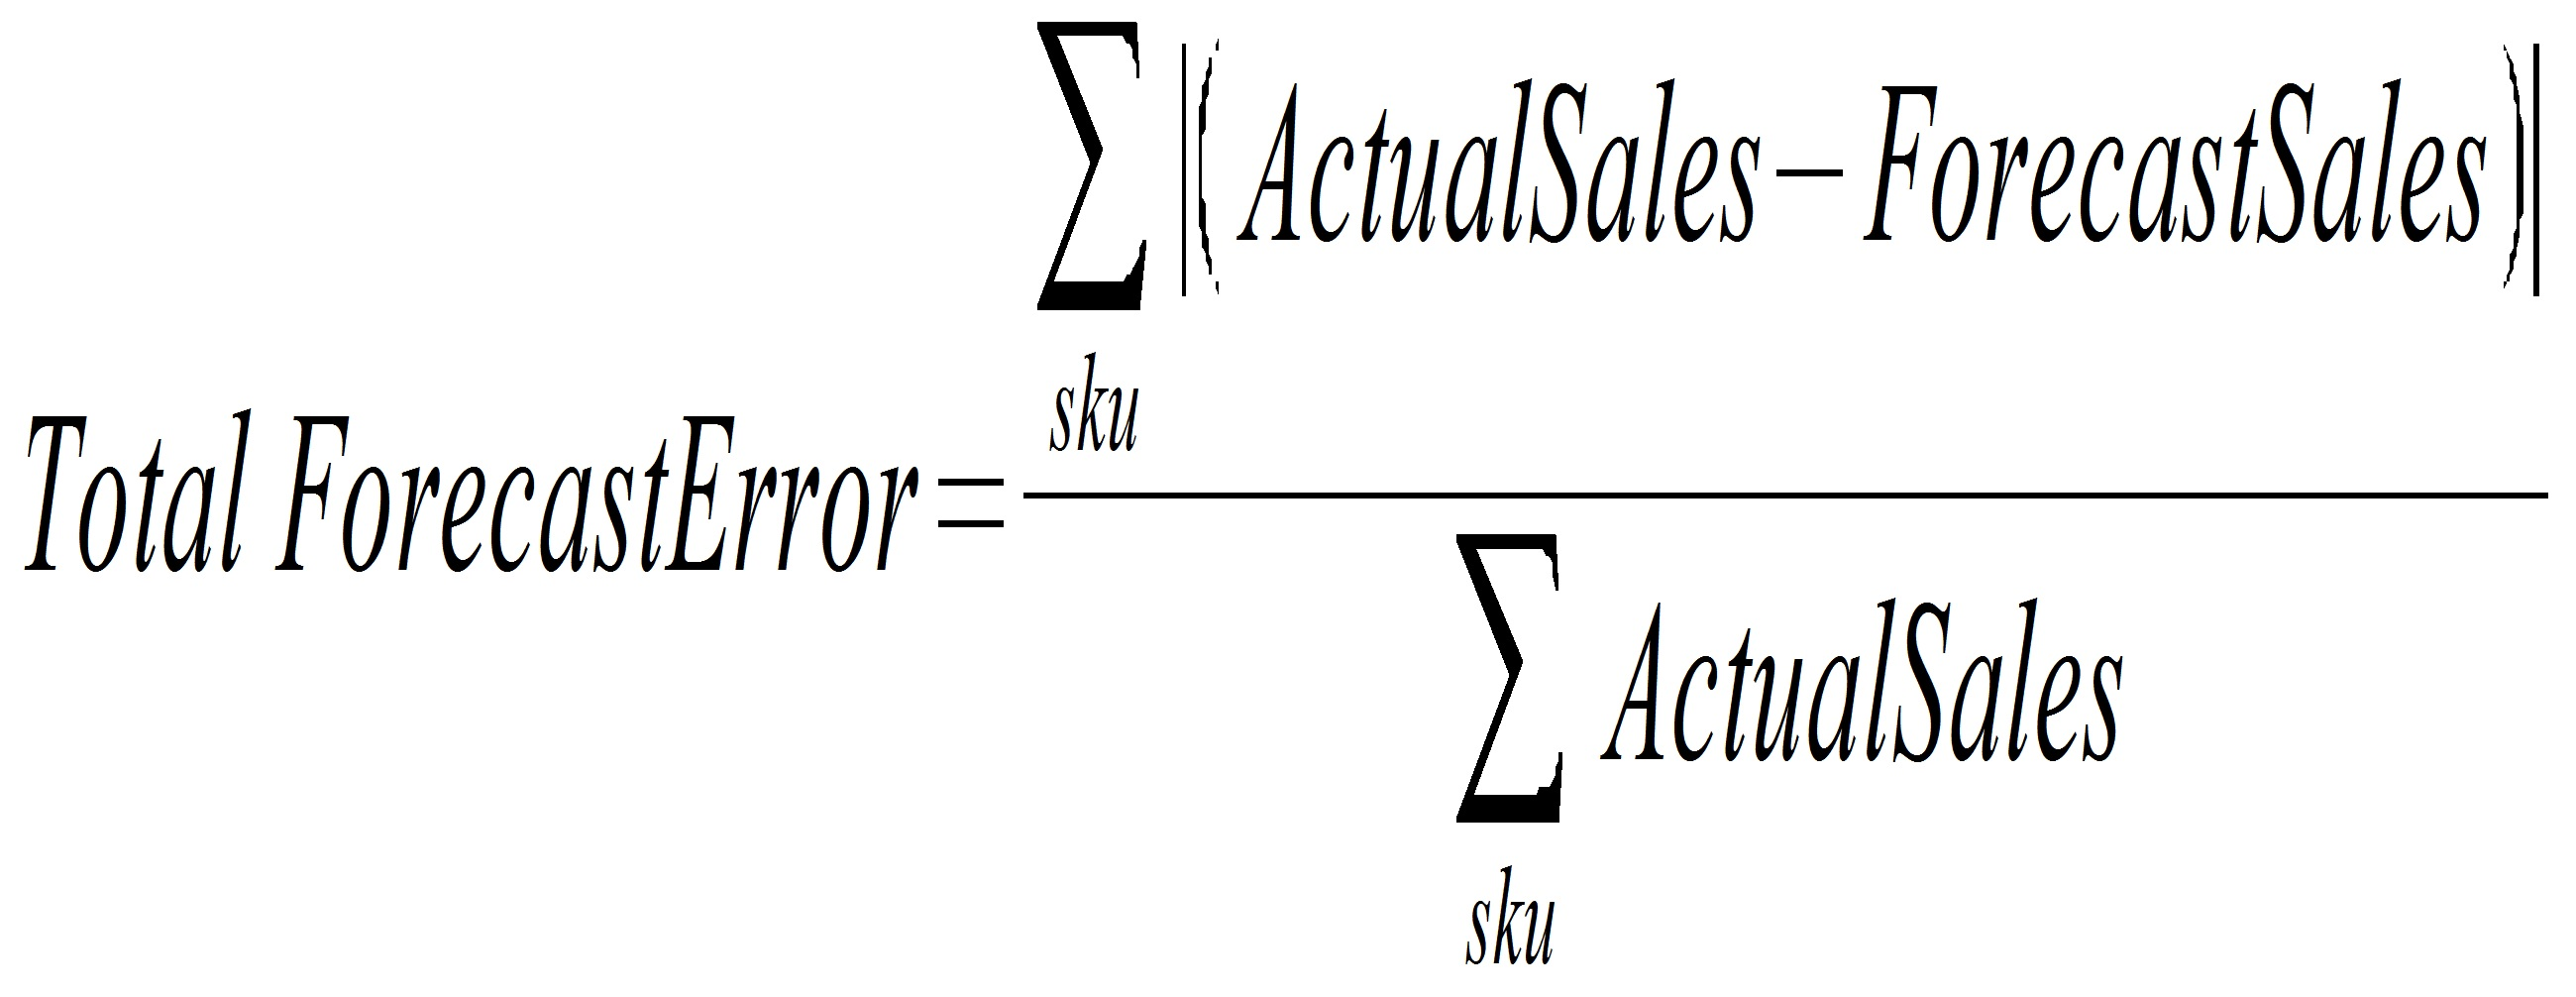

#### 1. Configuración de `TimeSeriesSplit` con `gap=1`
```python
tscv = TimeSeriesSplit(
    n_splits=5,
    test_size=1,  # Validar 1 mes (el mes+2 desde el último mes de entrenamiento)
    gap=1         # Respetar el mes intermedio (ej: entrenar hasta 201806, predecir 201808)
)
```


Supongamos que `train` tiene datos desde `201701` hasta `201909` (32 meses):

| Fold | Entrenamiento         | Validación (mes+2) | Explicación                                                                 |
|------|-----------------------|--------------------|-----------------------------------------------------------------------------|
| 1    | 201701 - 201712        | **201802**         | Entrena hasta 201712, salta 201801 (gap=1), predice 201802.                |
| 2    | 201701 - 201803        | **201805**         | Entrena hasta 201803, salta 201804 (gap=1), predice 201805.                |
| 3    | 201701 - 201806        | **201808**         | Entrena hasta 201806, salta 201807 (gap=1), predice 201808.                |
| 4    | 201701 - 201901        | **201903**         | Entrena hasta 201901, salta 201902 (gap=1), predice 201903.                |
| 5    | 201701 - 201907        | **201909**         | Entrena hasta 201907, salta 201908 (gap=1), predice 201909 (último mes).   |


---

### **¿Por qué `gap=1` y no `gap=2`?**
- **Definición de `gap` en `TimeSeriesSplit`**:  
  El `gap` es el número de muestras **entre el final del entrenamiento y el inicio de la validación**.  
  - En tu caso:  
    - Si entrenas hasta `201806`, el siguiente mes (`201807`) es el `gap=1`, y el target es `201808`.  
    - Por lo tanto, `gap=1` asegura que la validación comience en `201808` (no en `201809`).  

---

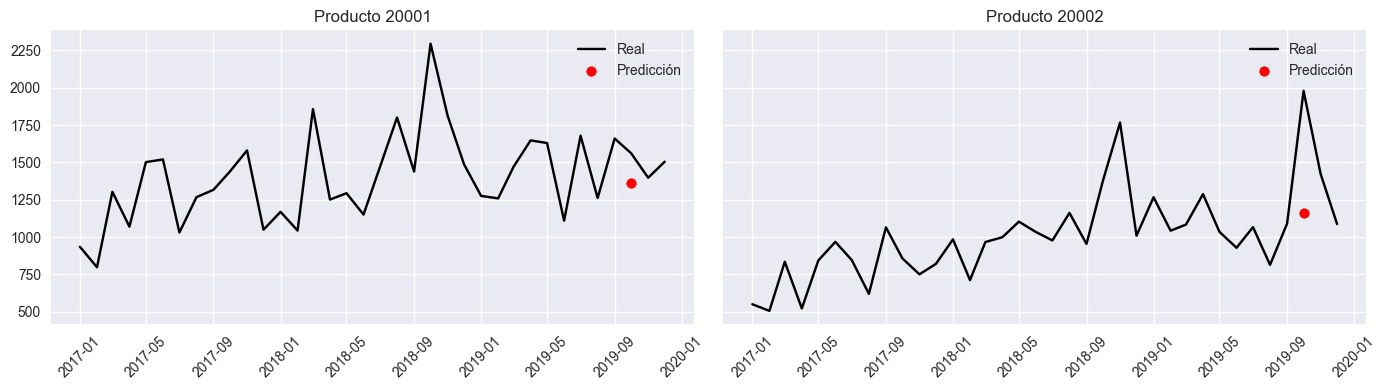

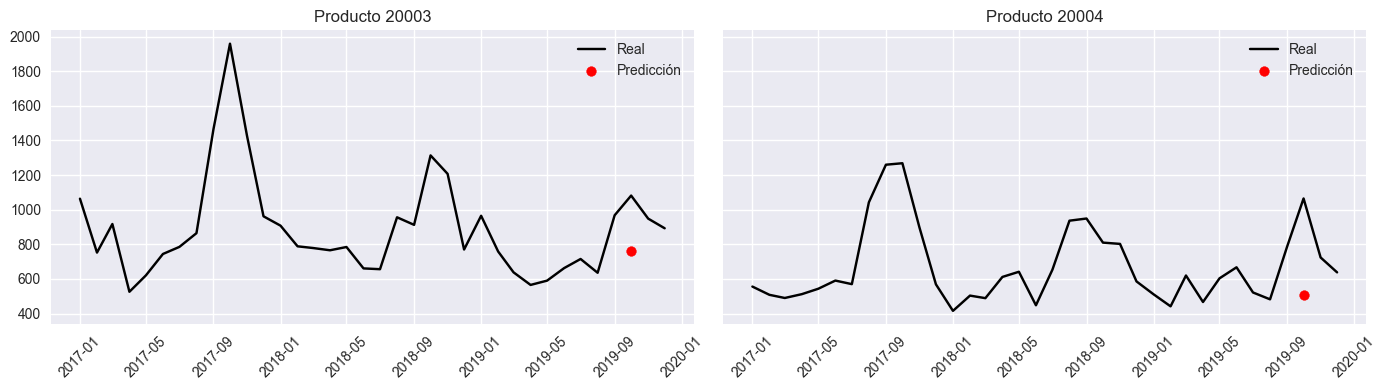

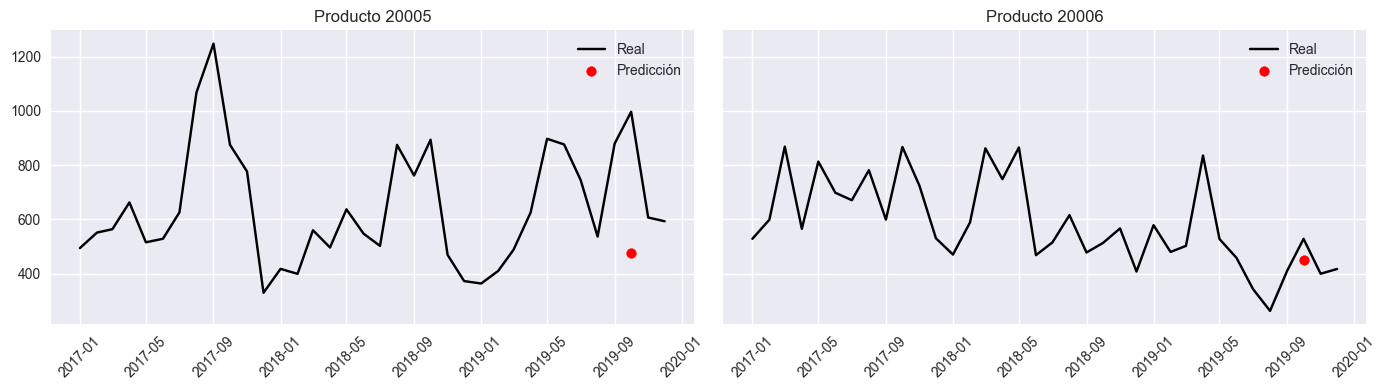

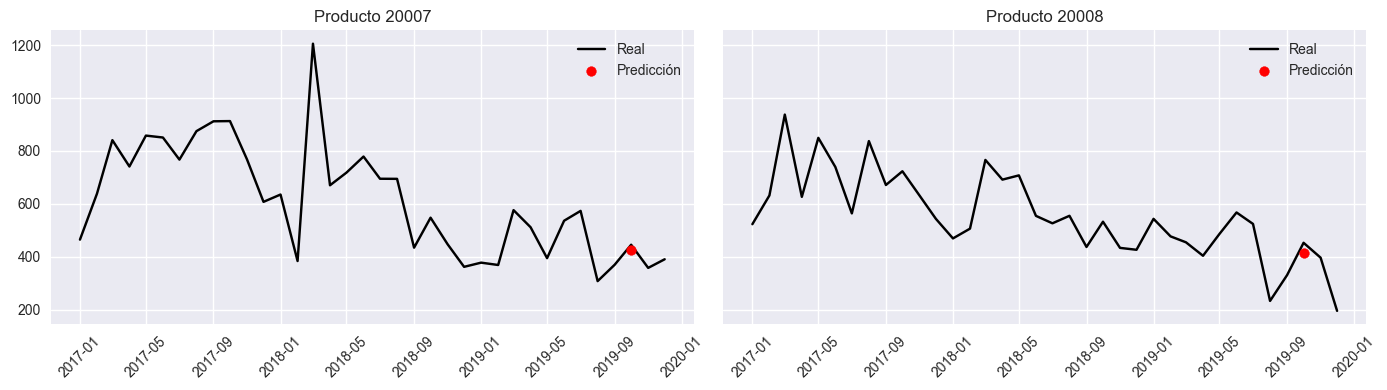

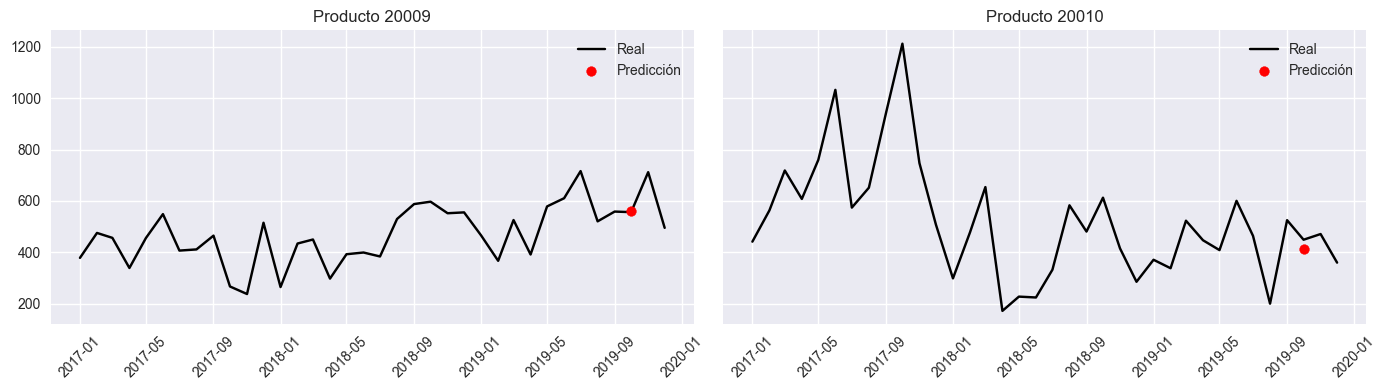

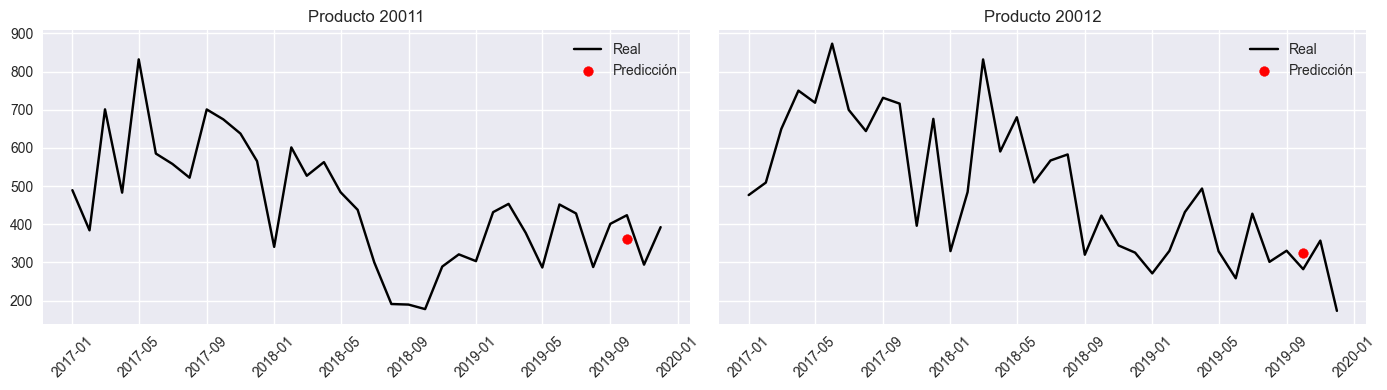

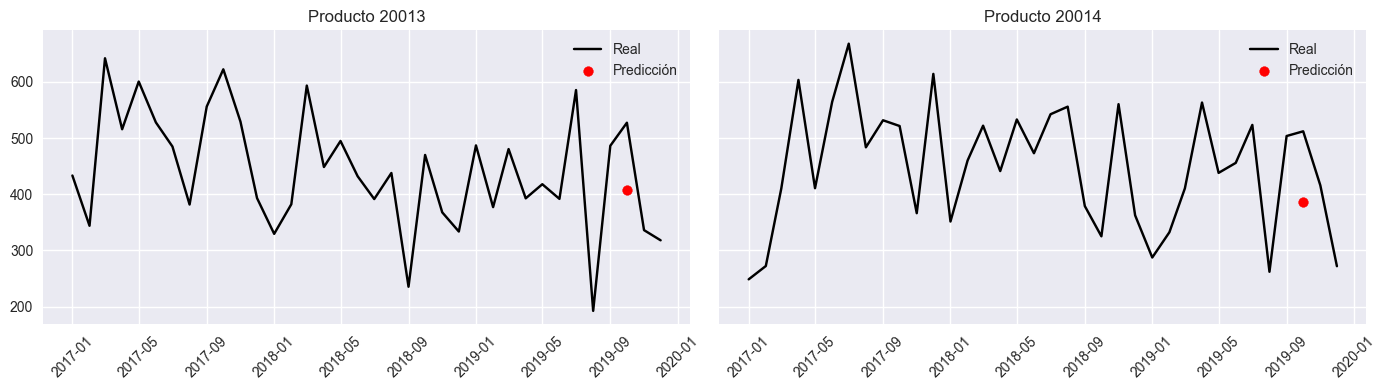

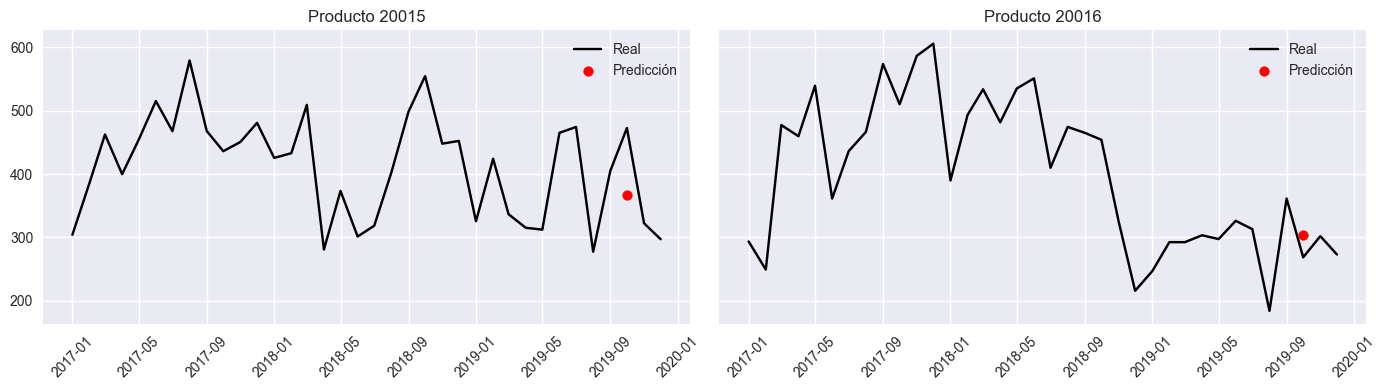

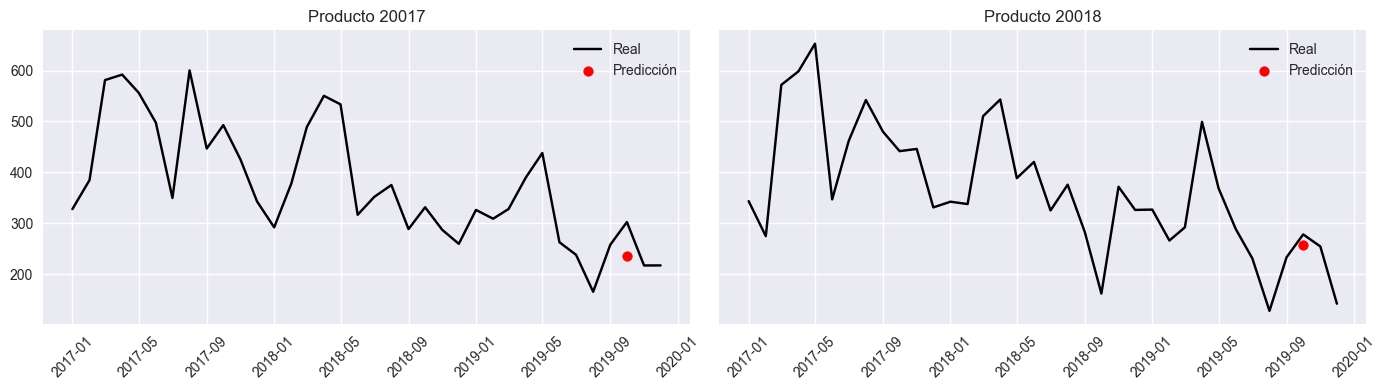

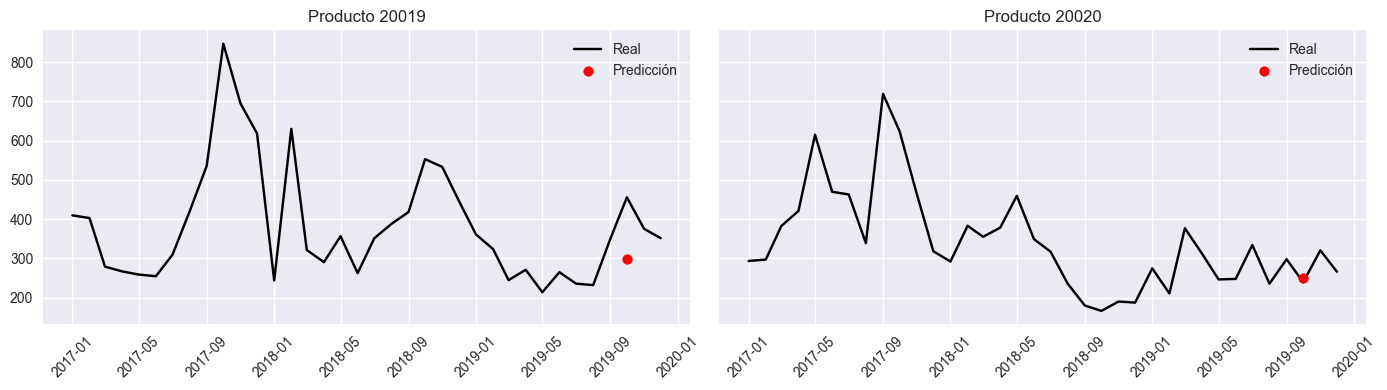

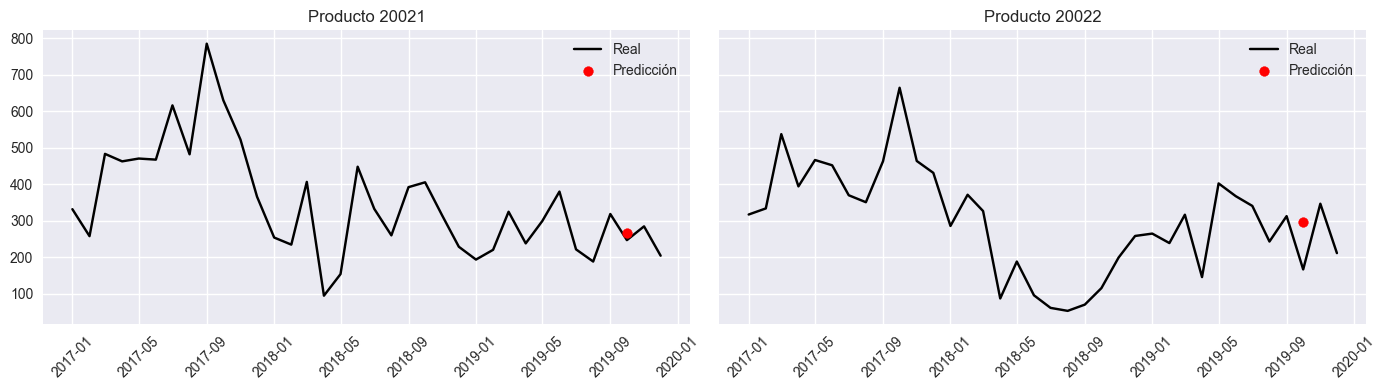

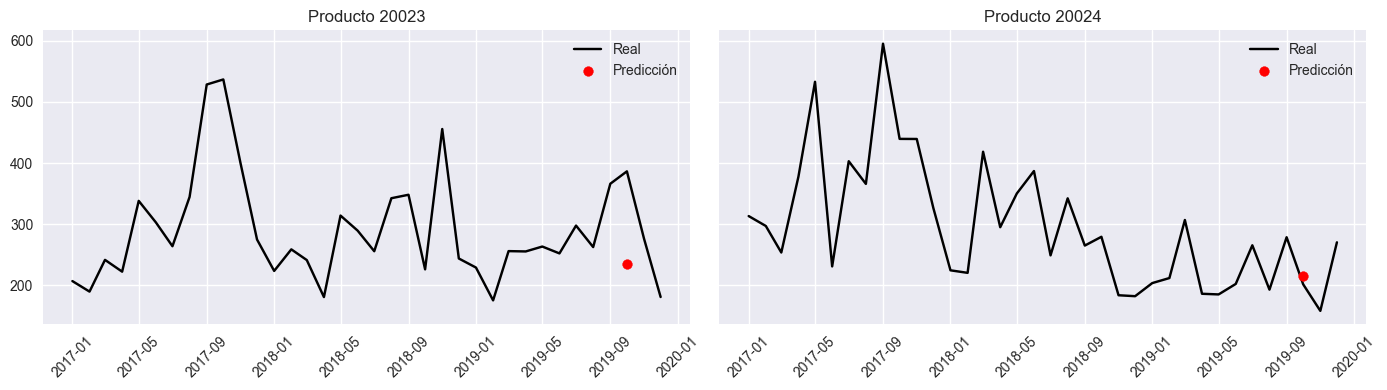

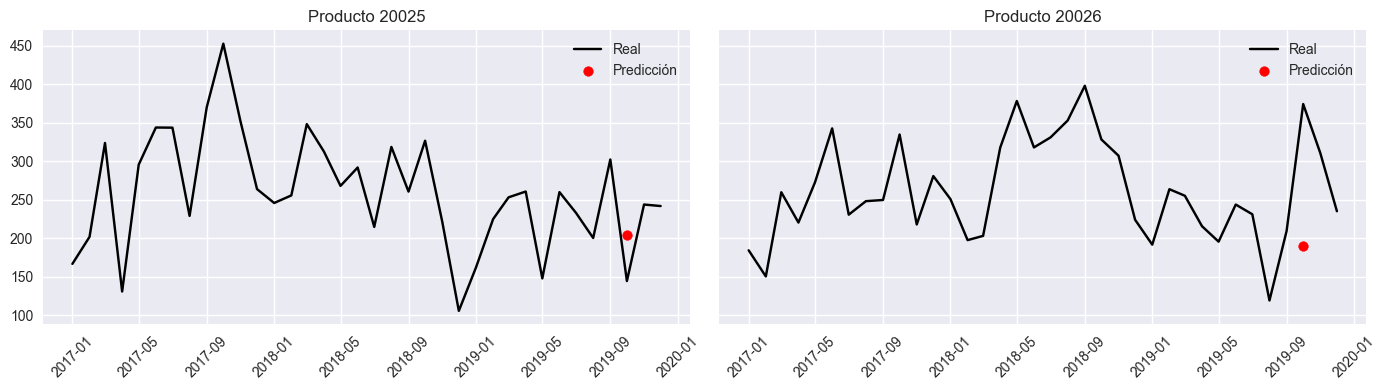

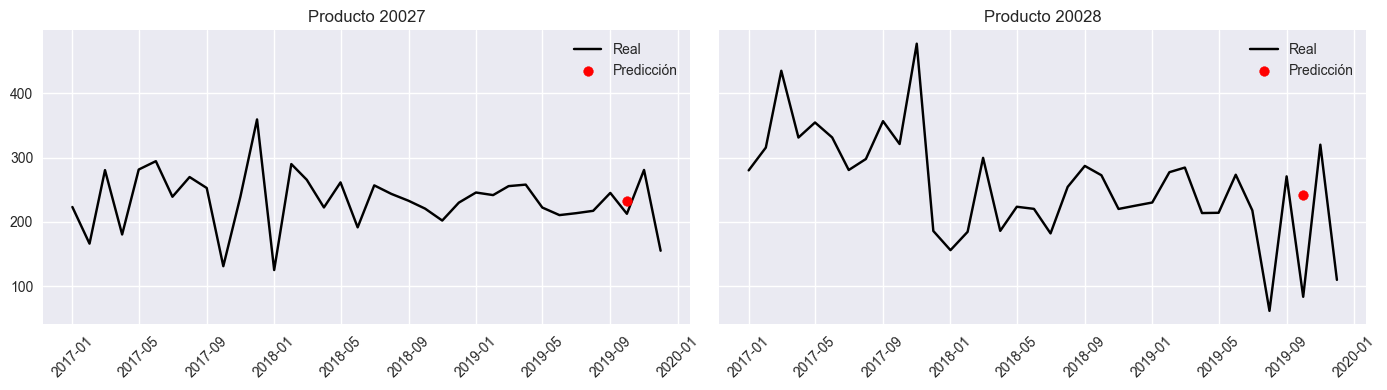

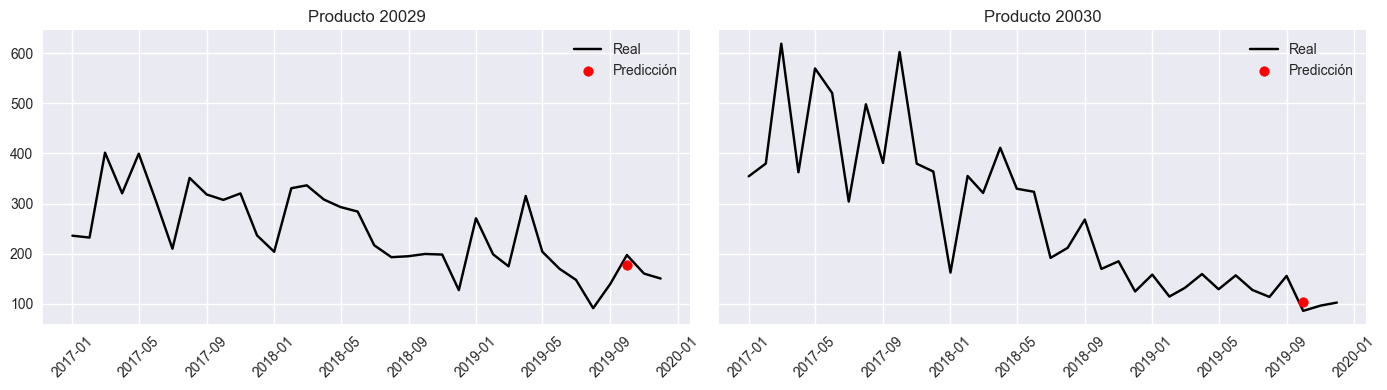

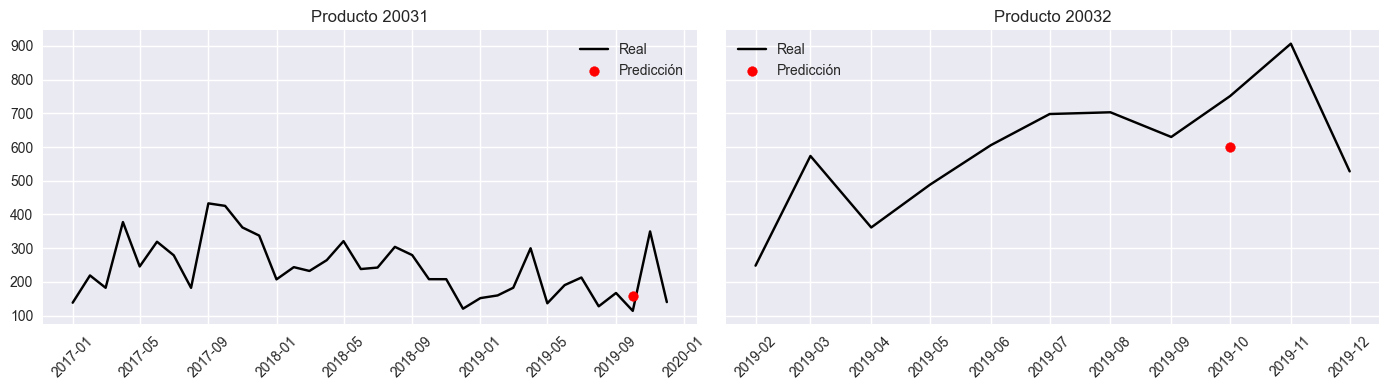

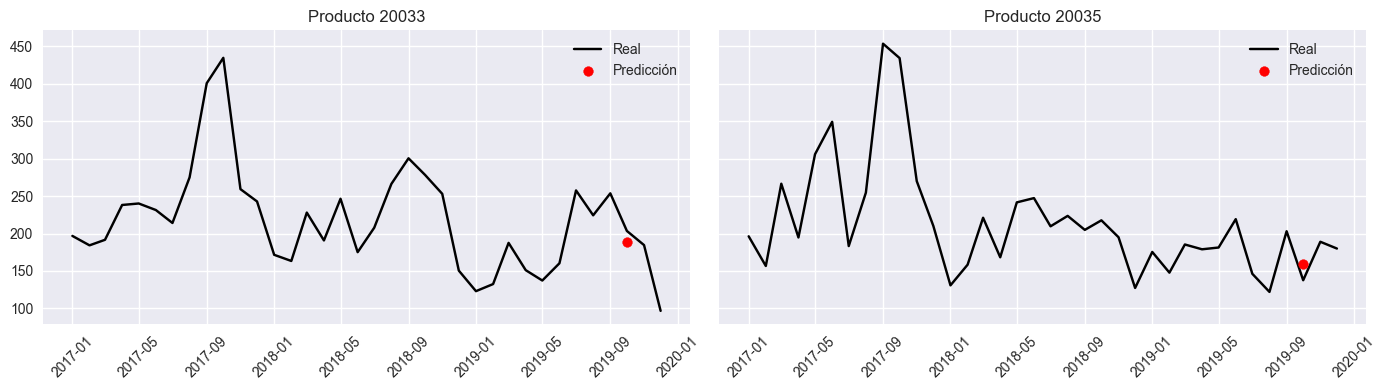

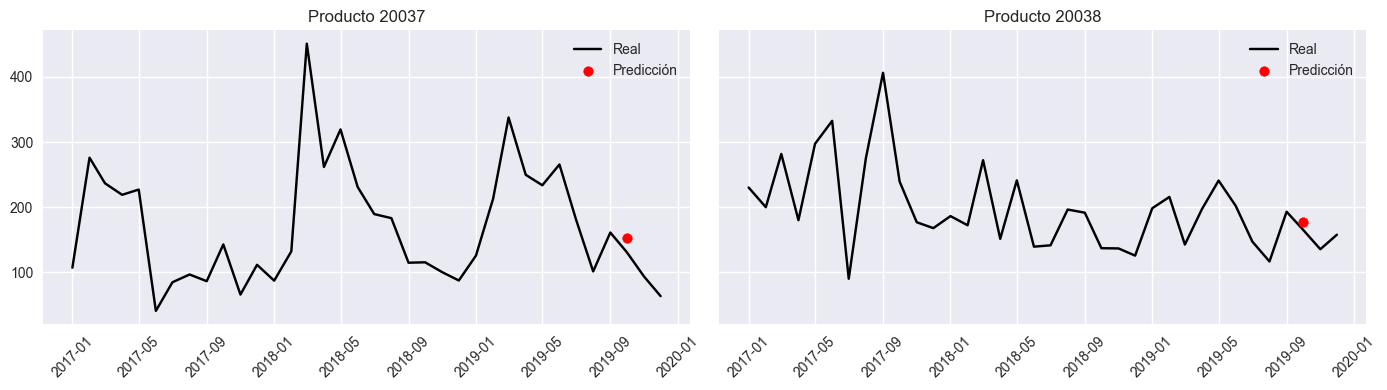

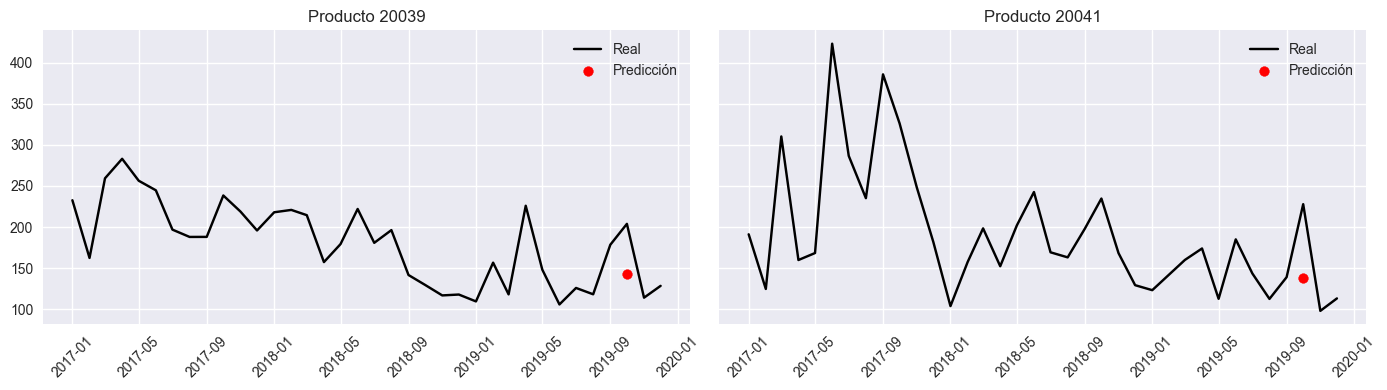

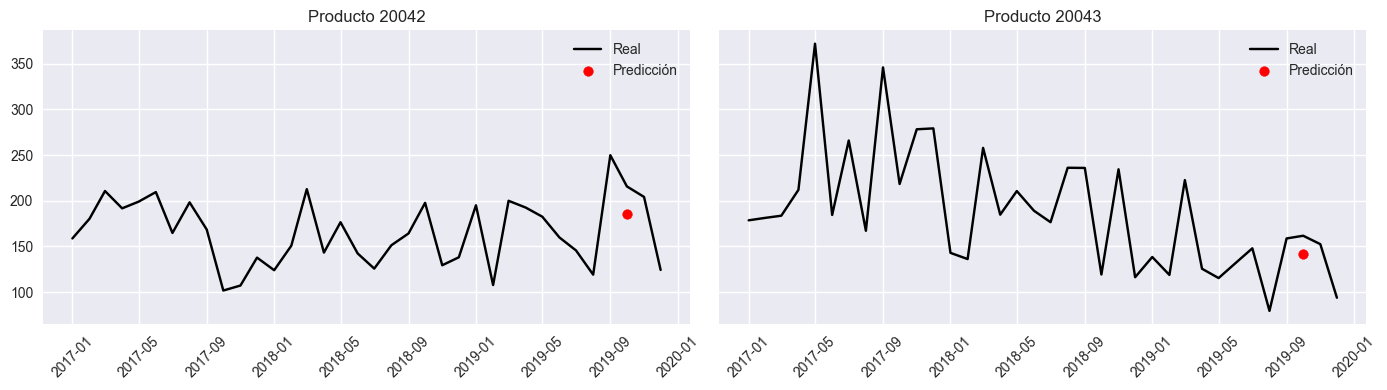

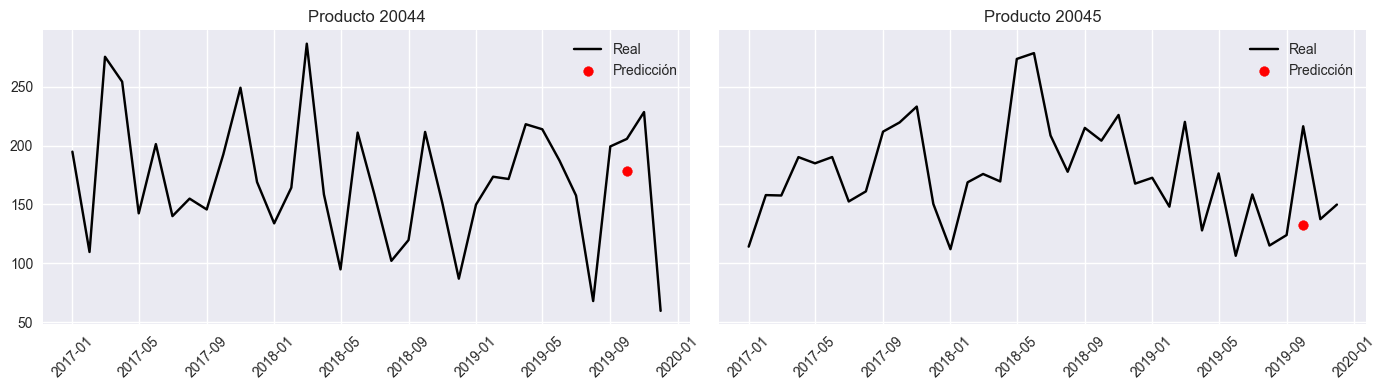

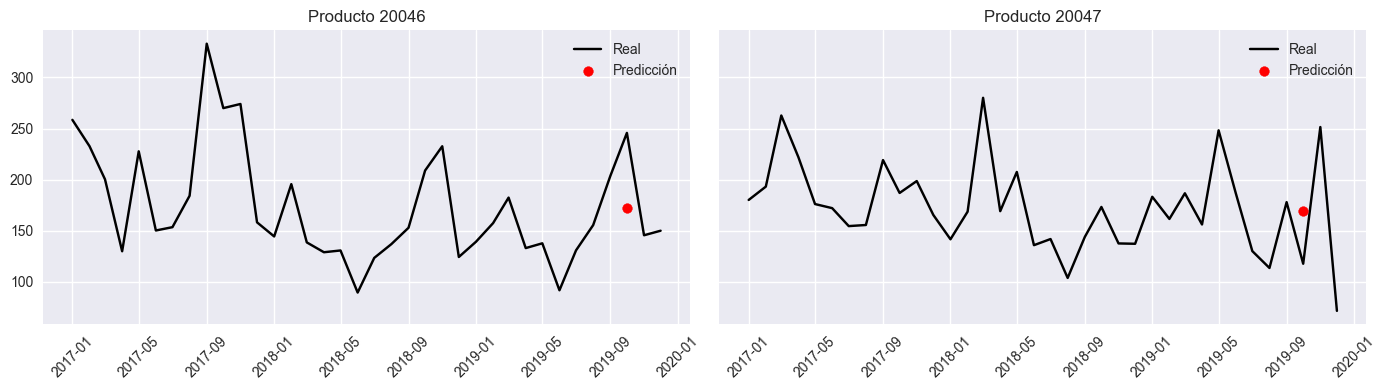

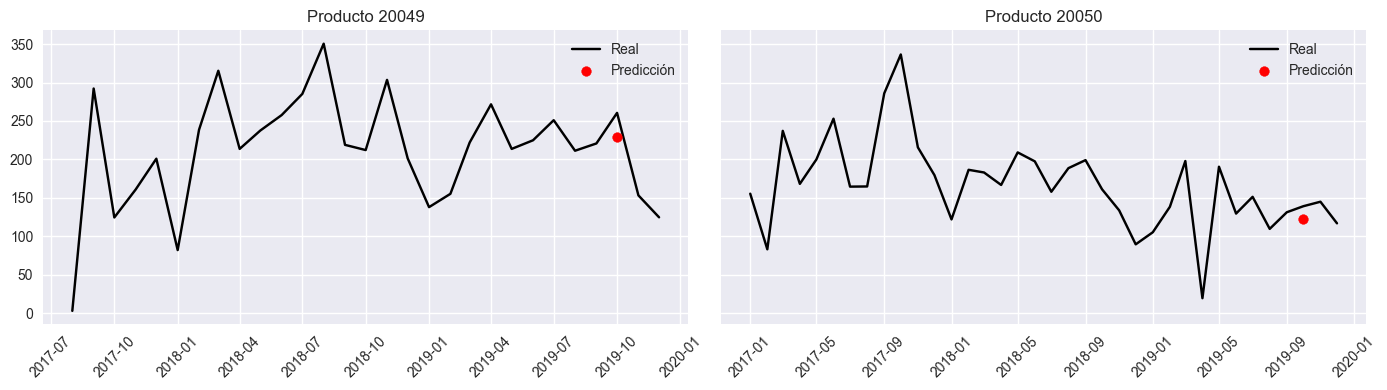

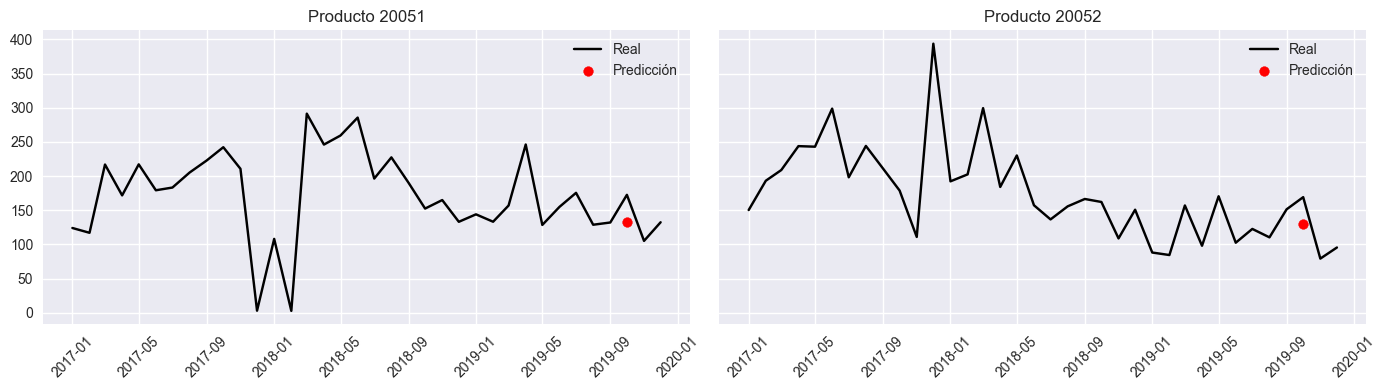

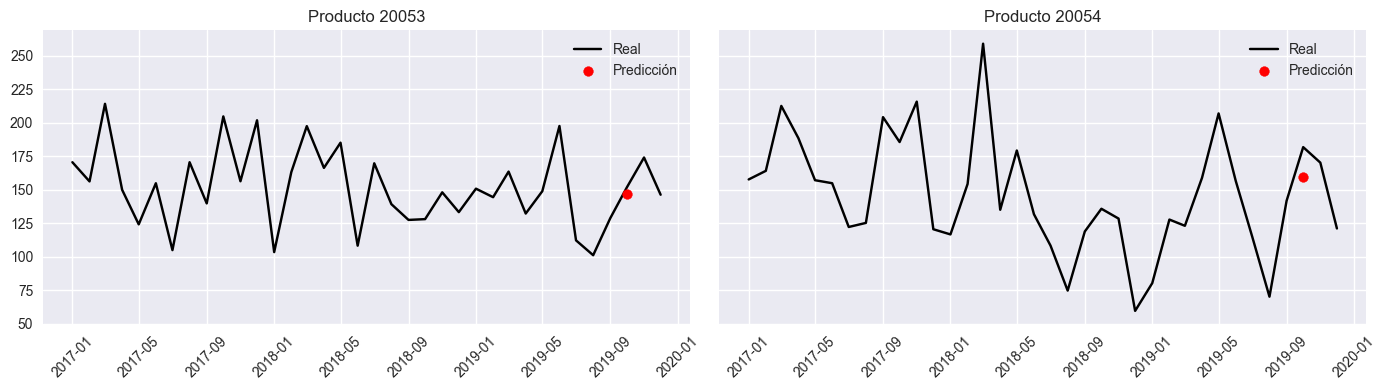

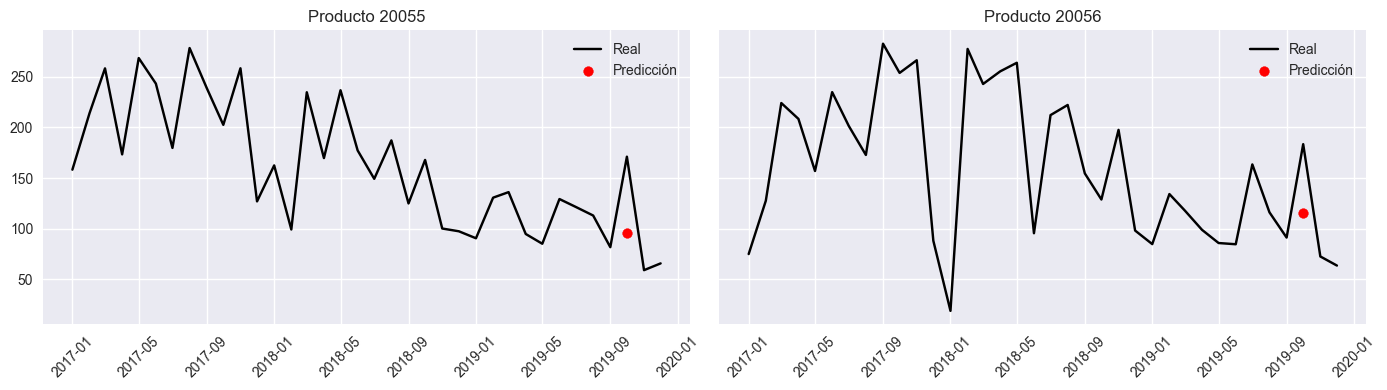

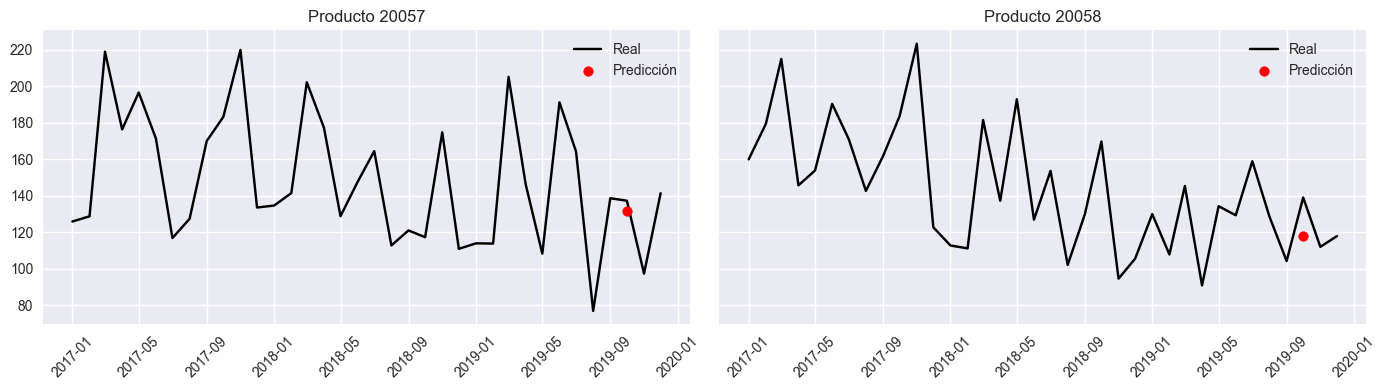

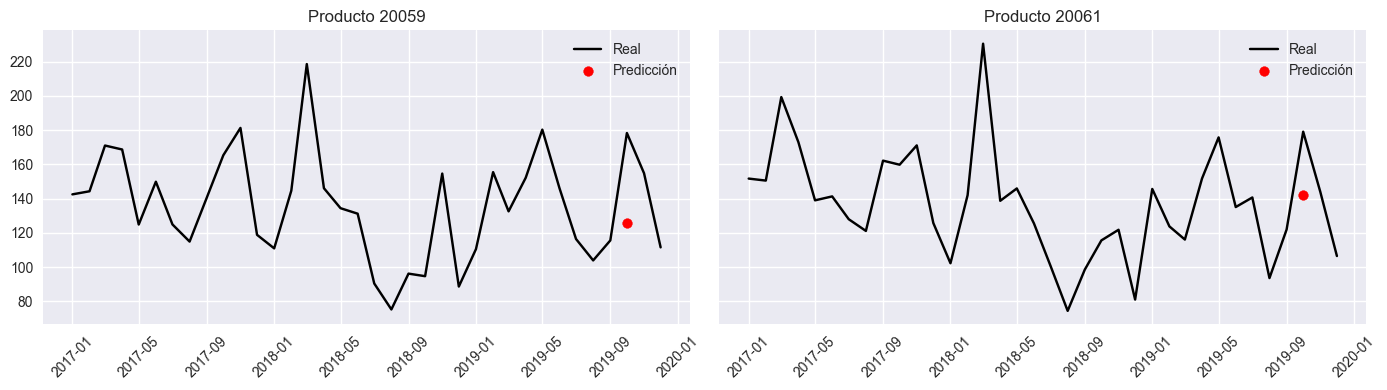

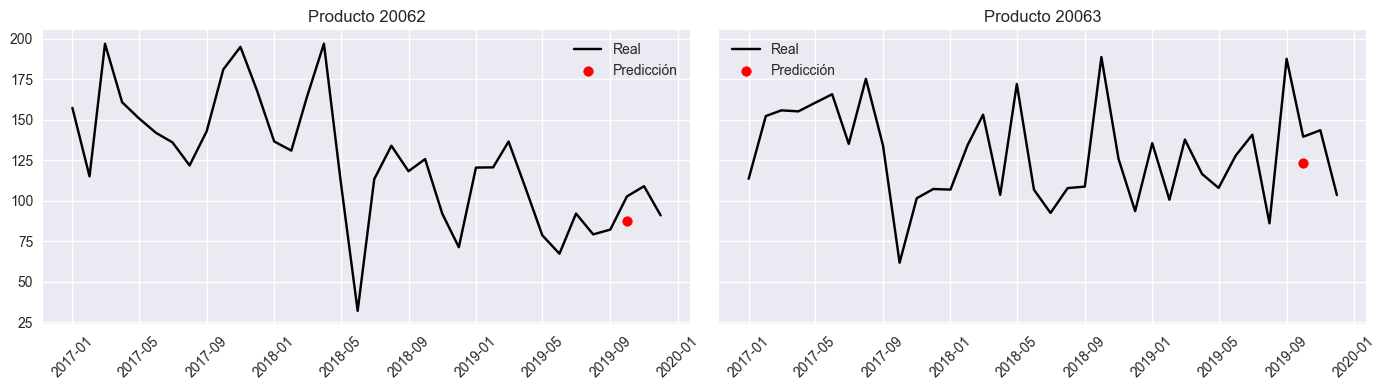

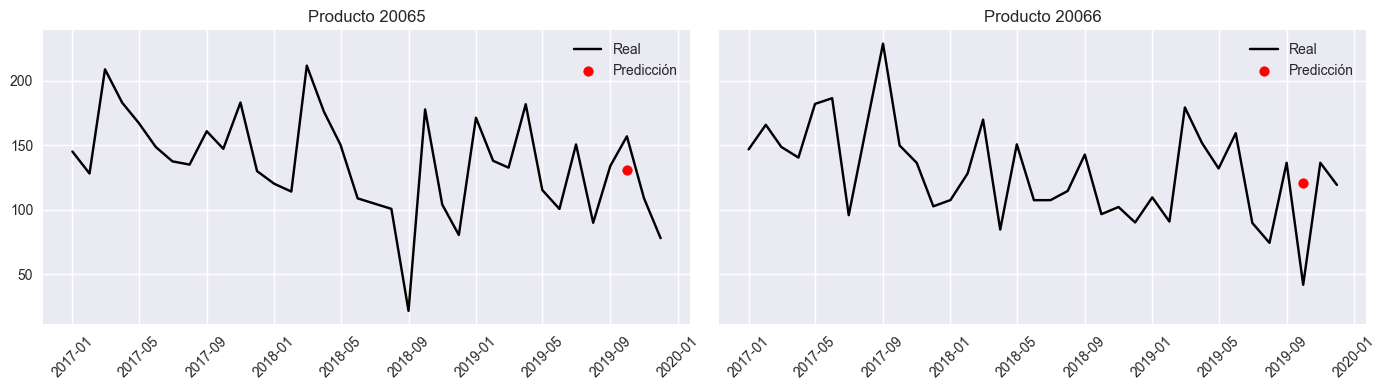

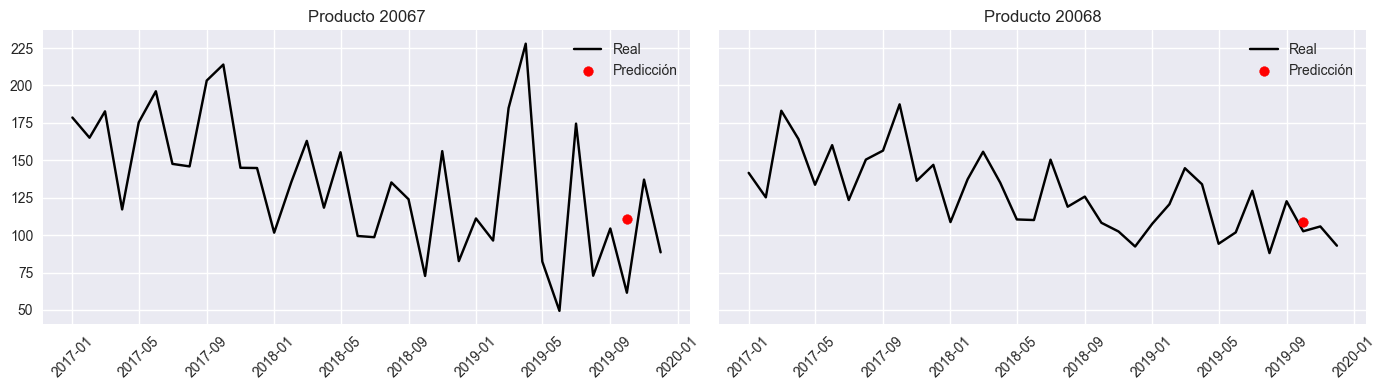

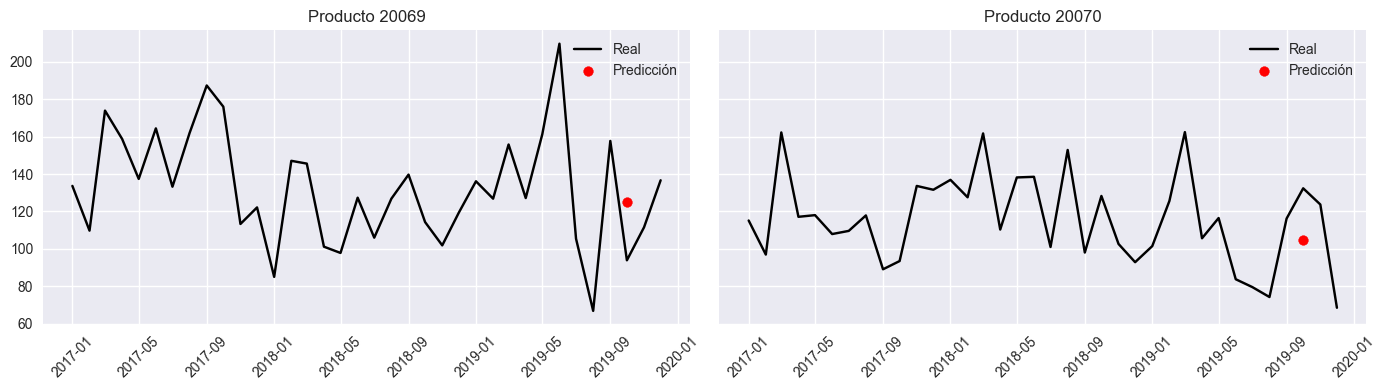

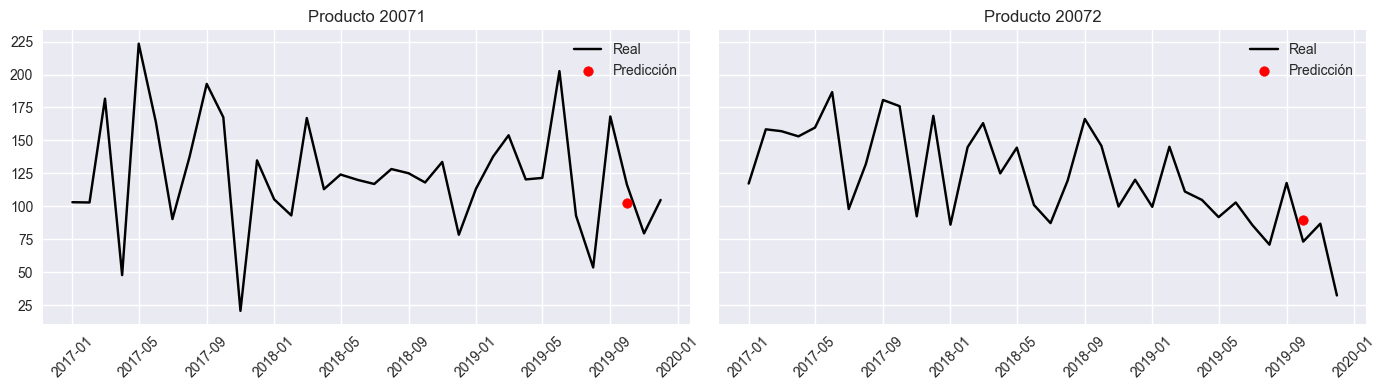

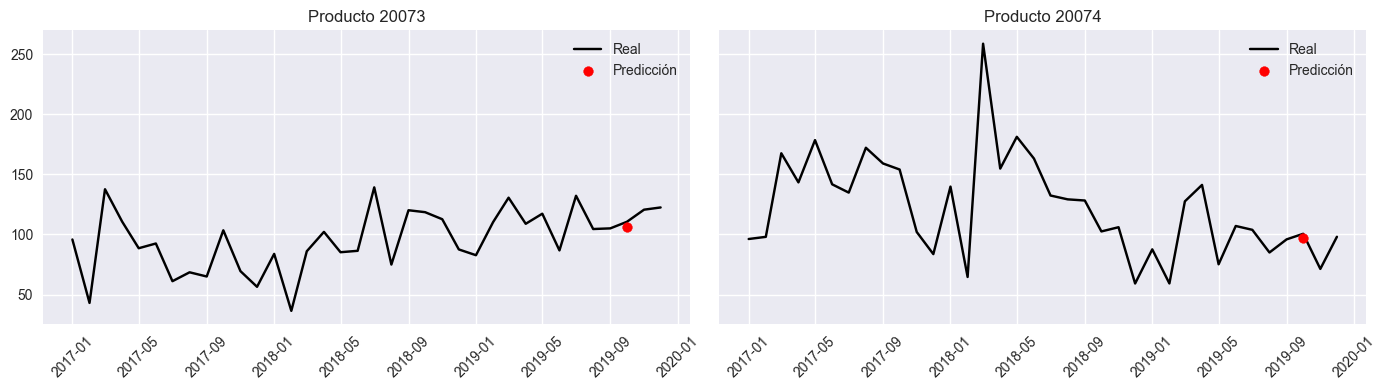

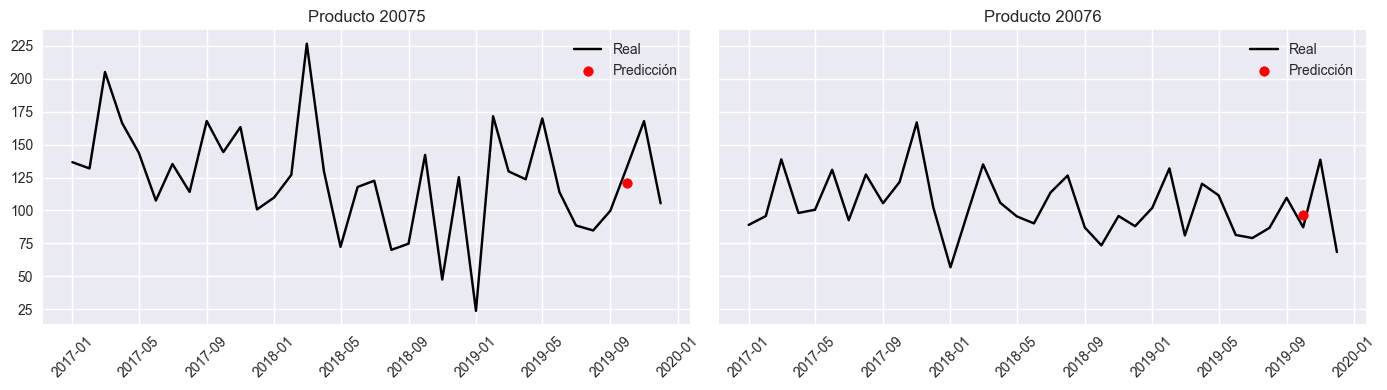

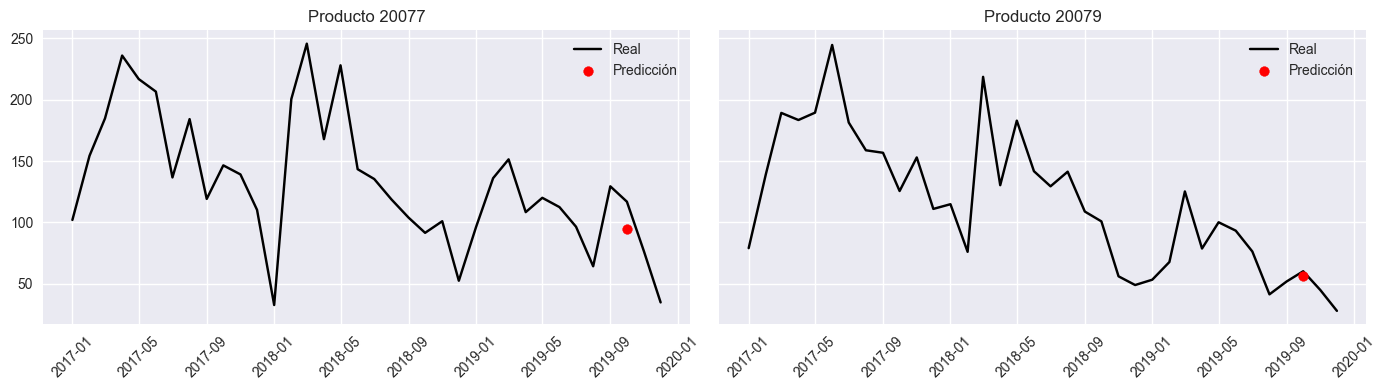

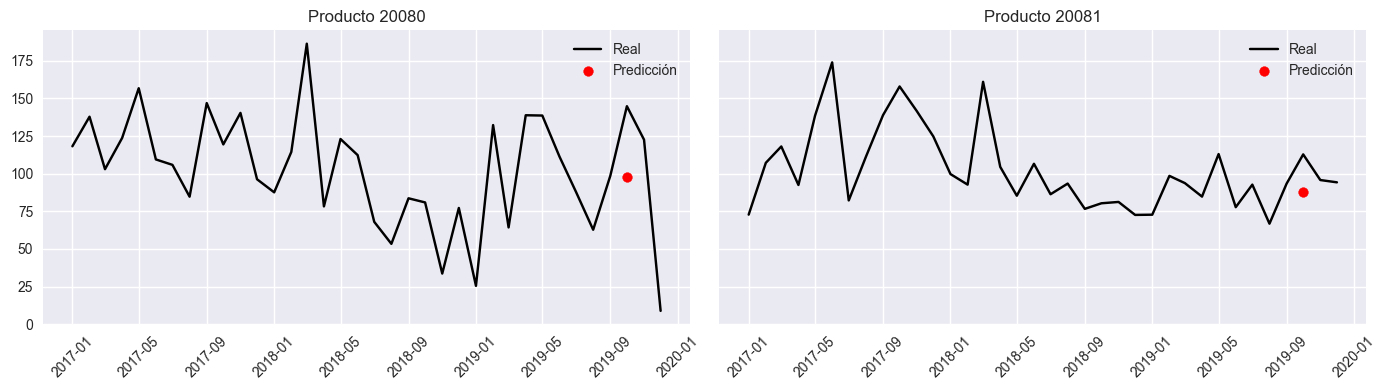

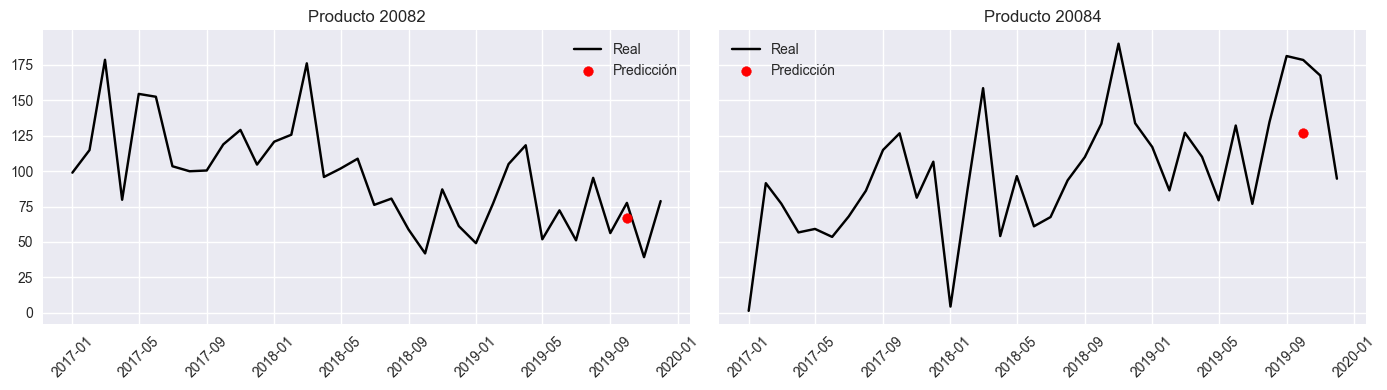

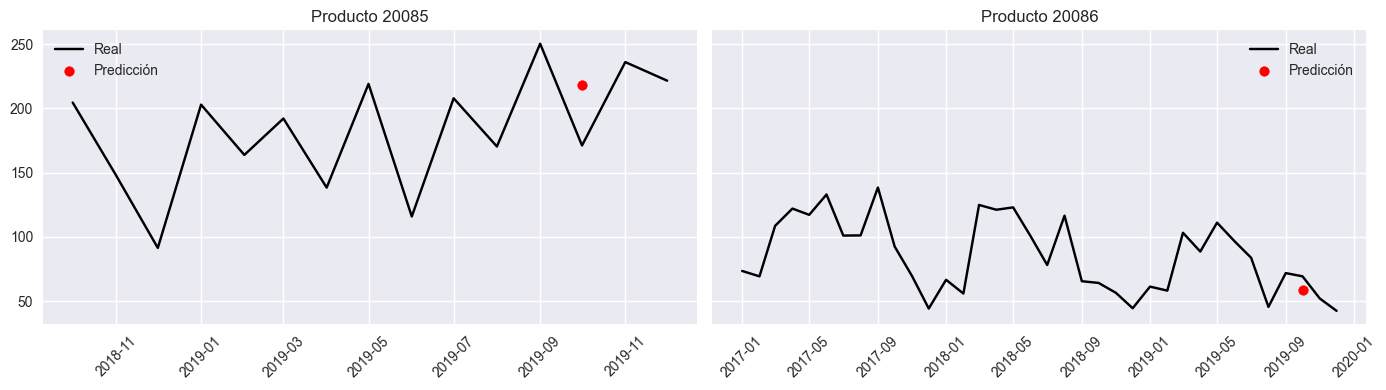

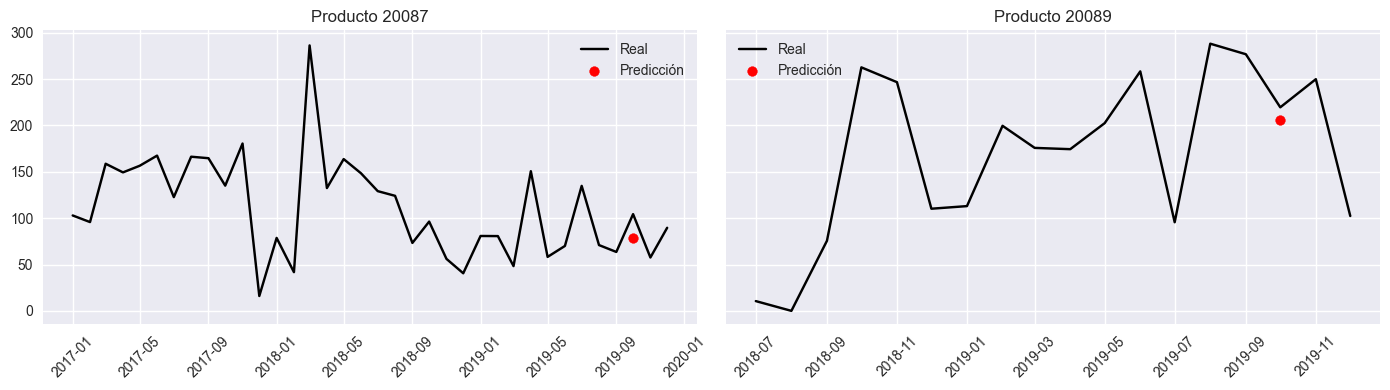

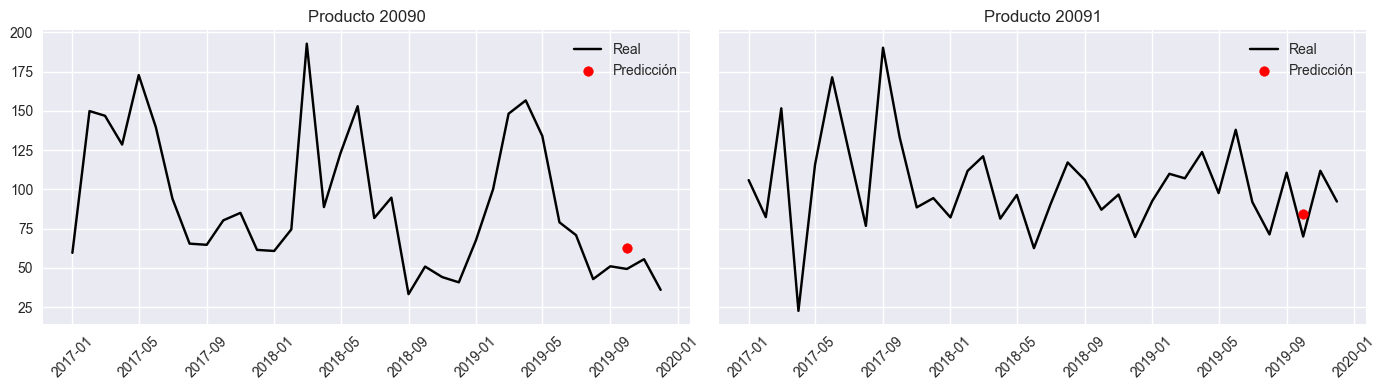

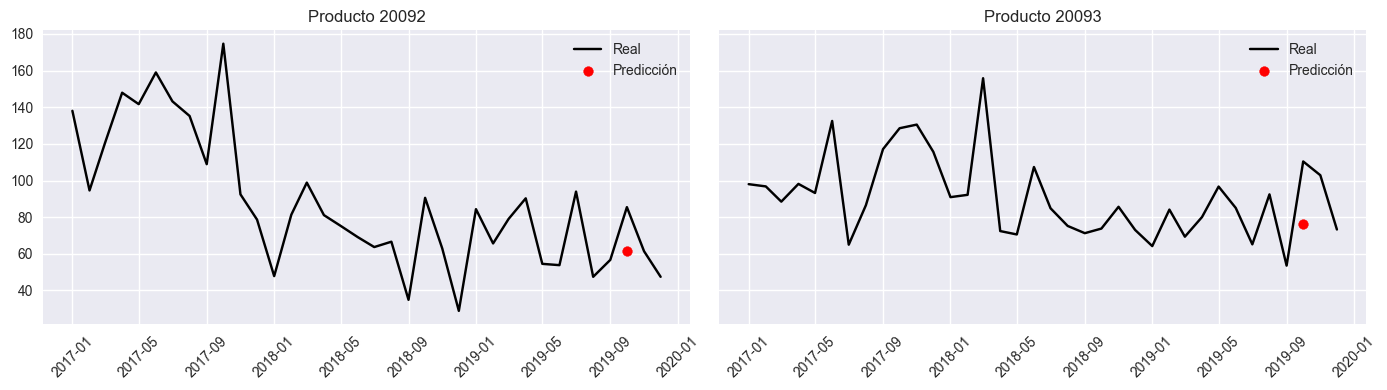

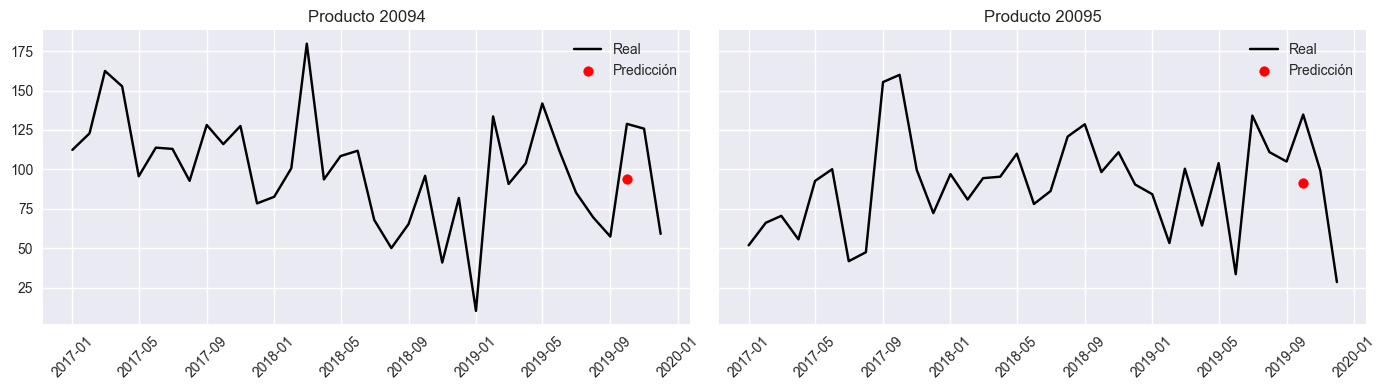

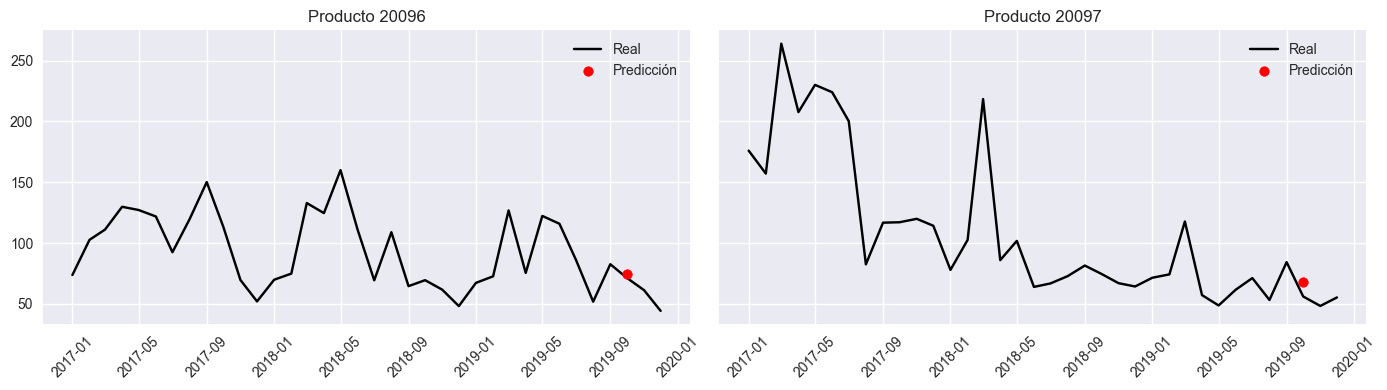

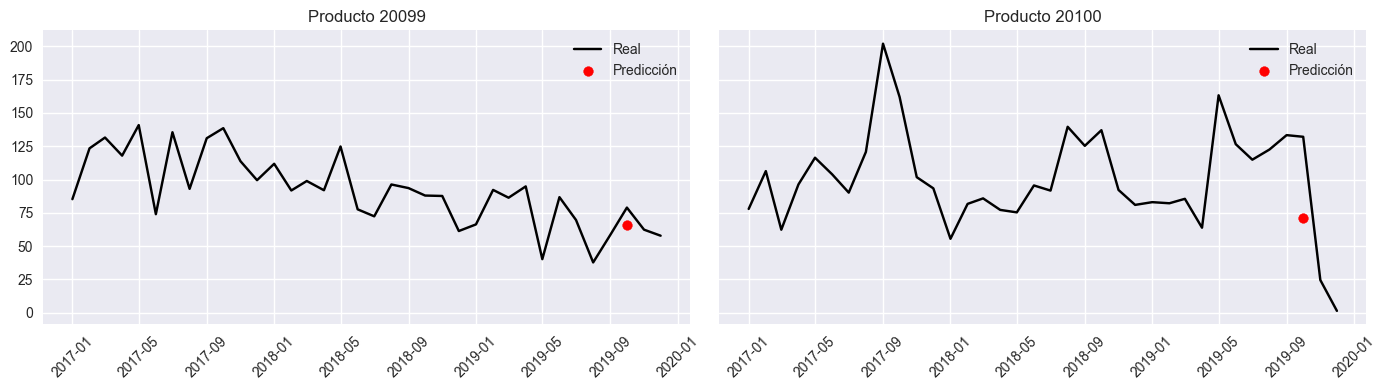

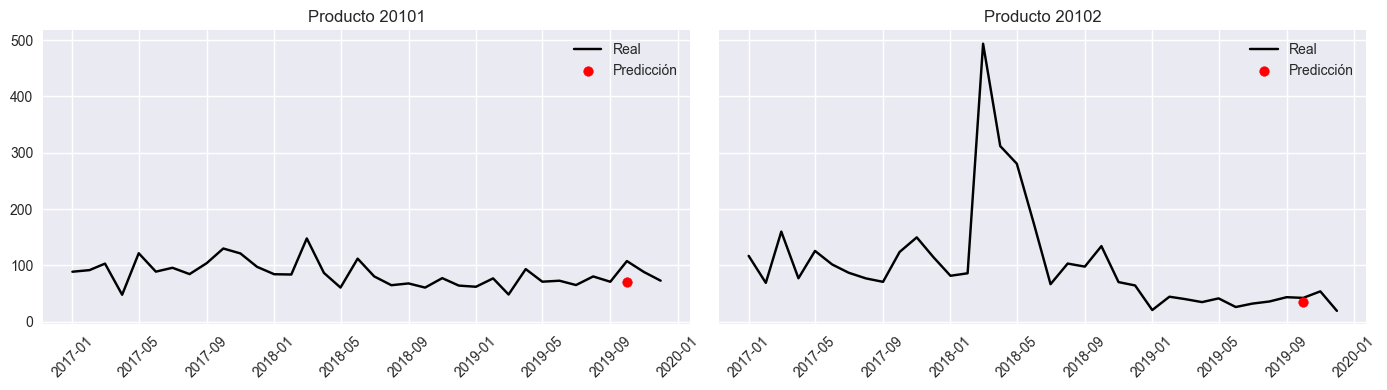

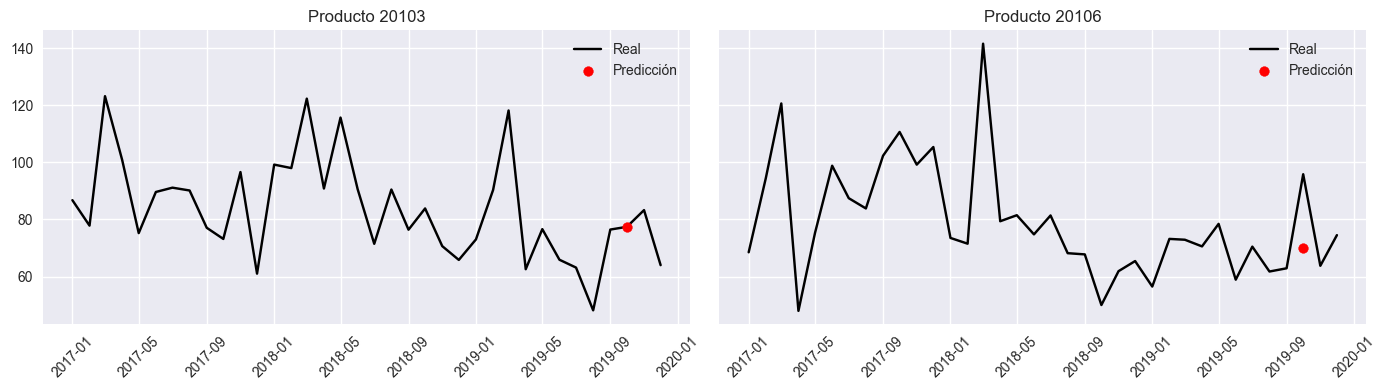

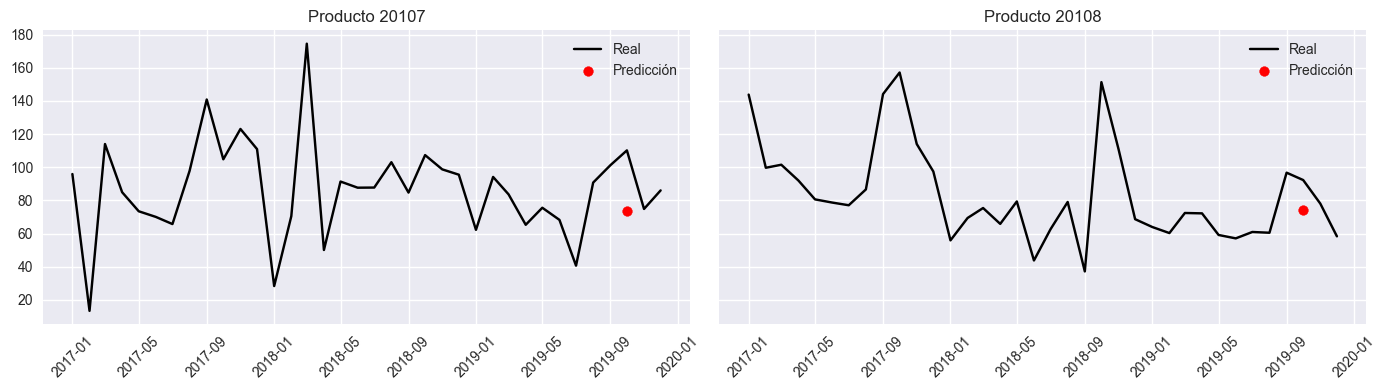

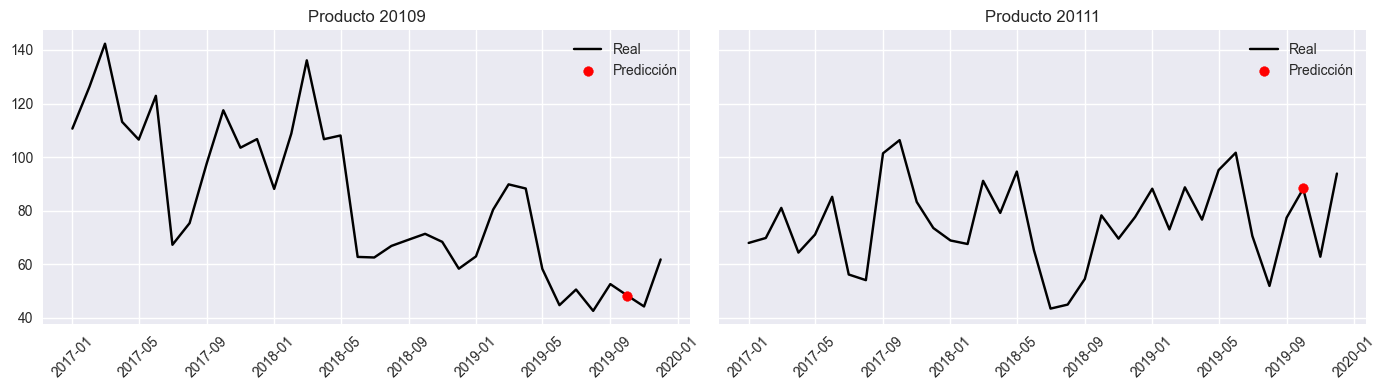

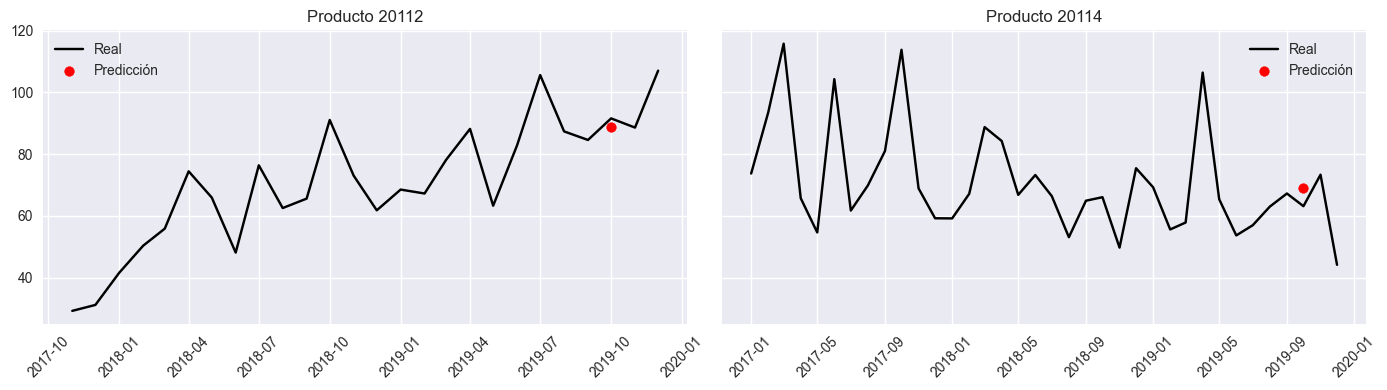

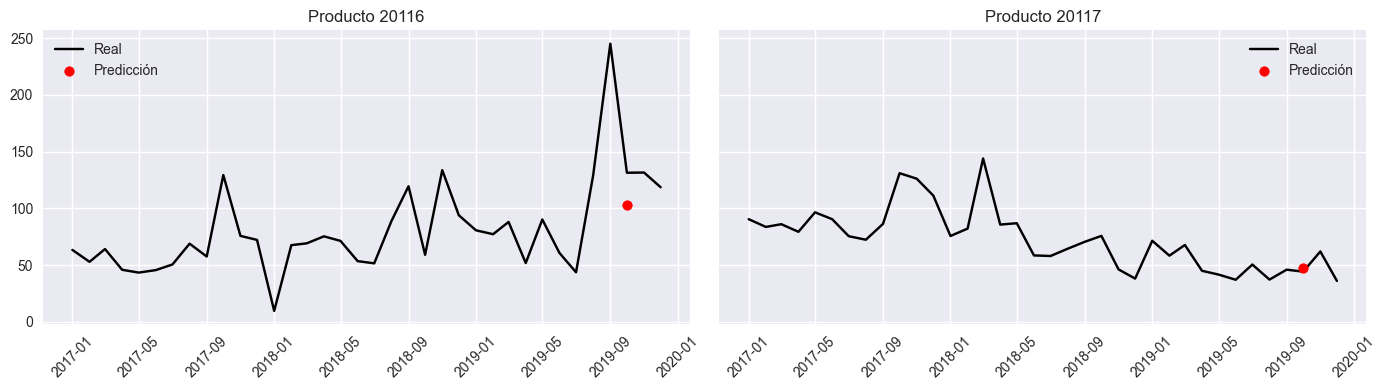

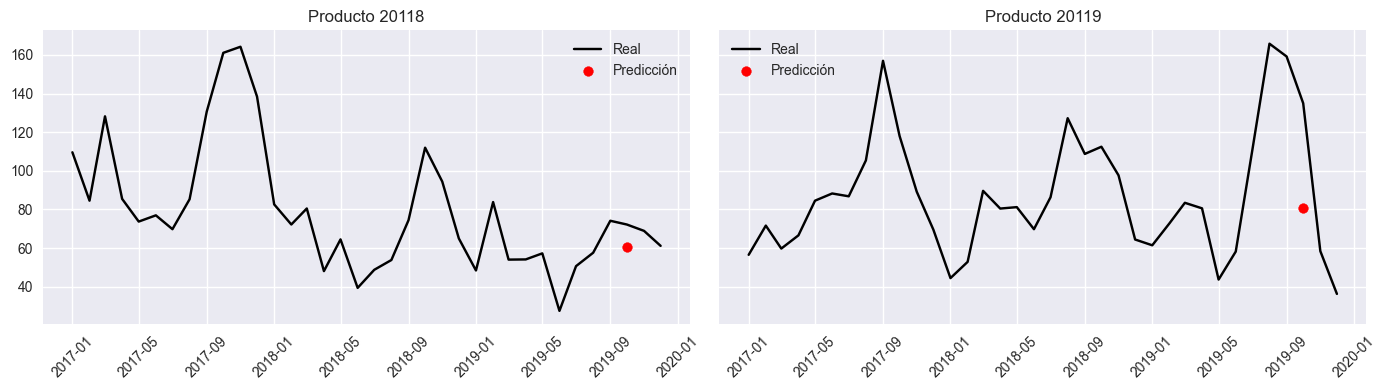

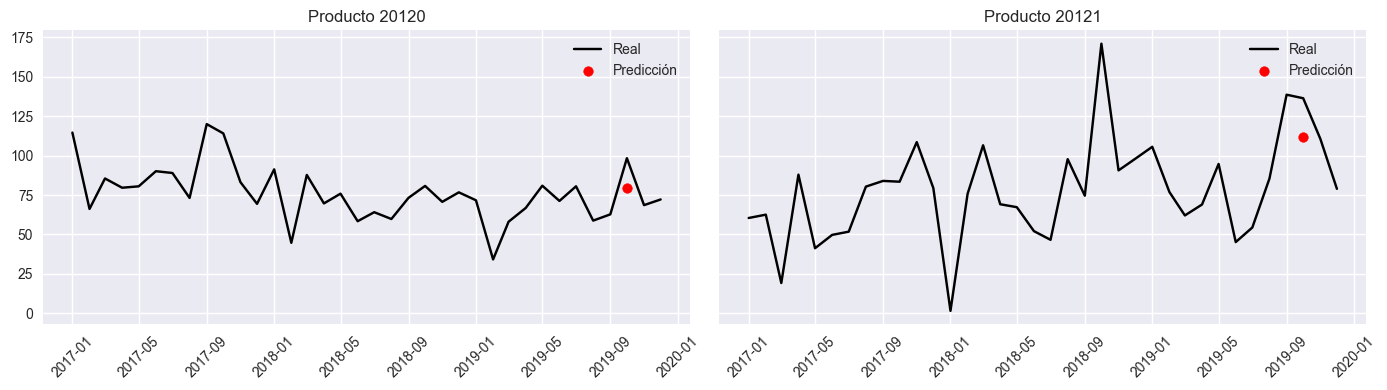

KeyboardInterrupt: 

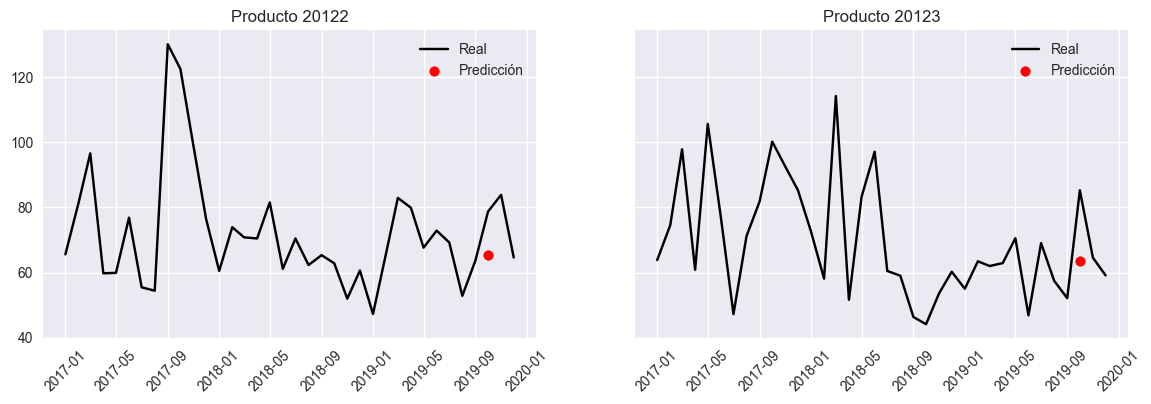

In [105]:
graficos.graficar_780(df_pred_201912_real)